# Predicting GDP from country variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
countries = pd.read_csv("/kaggle/input/cleaned-countriescsv/cleaned_countries.csv", index_col=0) ## remember to remove the extra unnecessary column when reading 

## Check
countries.head()

,Country,Region,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,...,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked,cluster_labels
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,0,2306.0,16307.0,700.0,360.0,...,22.0,8765.0,1.0,466.0,2034.0,38.0,24.000000,38.000,1,2
1,Albania,EASTERN EUROPE,3581655,28748,1246,126,-493.0,2152.0,4500.0,865.0,...,442.0,7449.0,3.0,1511.0,522.0,232.0,188.000000,579.000,0,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,138,4,-39.0,31.0,6000.0,700.0,...,25.0,9653.0,1.0,1714.0,461.0,101.0,6.000000,298.000,0,1
3,American Samoa,OCEANIA,57794,199,2904,5829,-2071.0,927.0,8000.0,970.0,...,15.0,75.0,2.0,2246.0,327.0,115.5,169.687500,473.375,0,1
4,Andorra,WESTERN EUROPE,71201,468,1521,0,66.0,405.0,19000.0,1000.0,...,0.0,9778.0,3.0,871.0,625.0,18.2,159.458333,492.625,1,3


### What are the predictors?

In [3]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop._Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'landlocked', 'cluster_labels'],
      dtype='object')

In [4]:
countries.describe()

,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked,cluster_labels
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,3790.471366,2116.533040,10.451704,3149.681660,9671.189427,833.874968,2352.151276,1163.067342,412.412400,6811.859788,2.995597,2038.439628,815.732445,105.932693,217.040294,412.156625,0.193833,1.726872
std,1.178913e+08,1.790282e+06,16601.858246,7228.686315,474.098427,3480.132019,10030.810760,192.515535,2262.049584,1268.867260,812.567274,3230.254639,3.552782,1222.906040,503.689740,123.288401,166.432936,258.949104,0.396173,0.947904
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-2099.000000,19.000000,500.000000,176.000000,2.000000,0.000000,0.000000,50.000000,1.000000,10.000000,22.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,4.376240e+05,4.647500e+03,291.500000,10.000000,-71.000000,658.500000,1900.000000,753.000000,385.000000,190.000000,10.000000,5650.500000,2.000000,1076.000000,515.052632,17.500000,43.000000,83.500000,0.000000,1.000000
50%,4.786994e+06,8.660000e+04,788.000000,73.000000,0.000000,1805.000000,5500.000000,925.000000,1762.000000,698.000000,91.000000,7952.000000,2.000000,1802.000000,711.000000,57.953488,216.183673,473.375000,0.000000,1.000000
75%,1.749777e+07,4.418110e+05,1901.500000,1034.500000,77.000000,4875.000000,15700.000000,980.000000,3829.000000,1747.000000,401.500000,9288.500000,3.000000,2909.000000,1025.500000,157.000000,309.500000,613.000000,0.000000,3.000000
max,1.313974e+09,1.707520e+07,162715.000000,87066.000000,2306.000000,19119.000000,55100.000000,1000.000000,10356.000000,6211.000000,5068.000000,9998.000000,25.000000,5073.000000,2974.000000,769.000000,906.000000,954.000000,1.000000,4.000000


We see a 5 figure summary of the columns here, and also see that there are 227 unique rows, each representing a country. 

In [5]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop._Density          int64
Coastline             int64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
landlocked            int64
cluster_labels        int64
dtype: object

In [6]:
## Drop landlocked and cluster labels
countries = countries.drop(["landlocked", 'cluster_labels'], axis = 1)


## Basic cleaning 

We noticed that there were some trailing whitespaces in the country name variable. 

For example, we were unable to find some countries that should have been in the dataset

In [7]:
'Singapore' in countries.Country.tolist()
'Indonesia' in countries.Country.tolist()

False

In [8]:
'Singapore ' in countries.Country.tolist()
'Indonesia ' in countries.Country.tolist()

True

Hence, remove the trailing white space

In [9]:
countries.Country = countries.Country.str.strip()

In [10]:
countries[countries.Country == 'Singapore']

,Country,Region,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
184,Singapore,ASIA (EX. NEAR EAST),4492150,693,64822,2785,1153.0,229.0,23700.0,925.0,4114.0,164.0,0.0,9836.0,2.0,934.0,428.0,0.0,339.0,661.0


## Basic univariate visualisations

Understanding the distributions of each variable 

Code taken from: https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f

In [11]:
cols = 3
rows = 7

numeric_cols = countries.select_dtypes(exclude = 'object').columns
print("The number of numeric columns: " , len(numeric_cols))

The number of numeric columns:  18


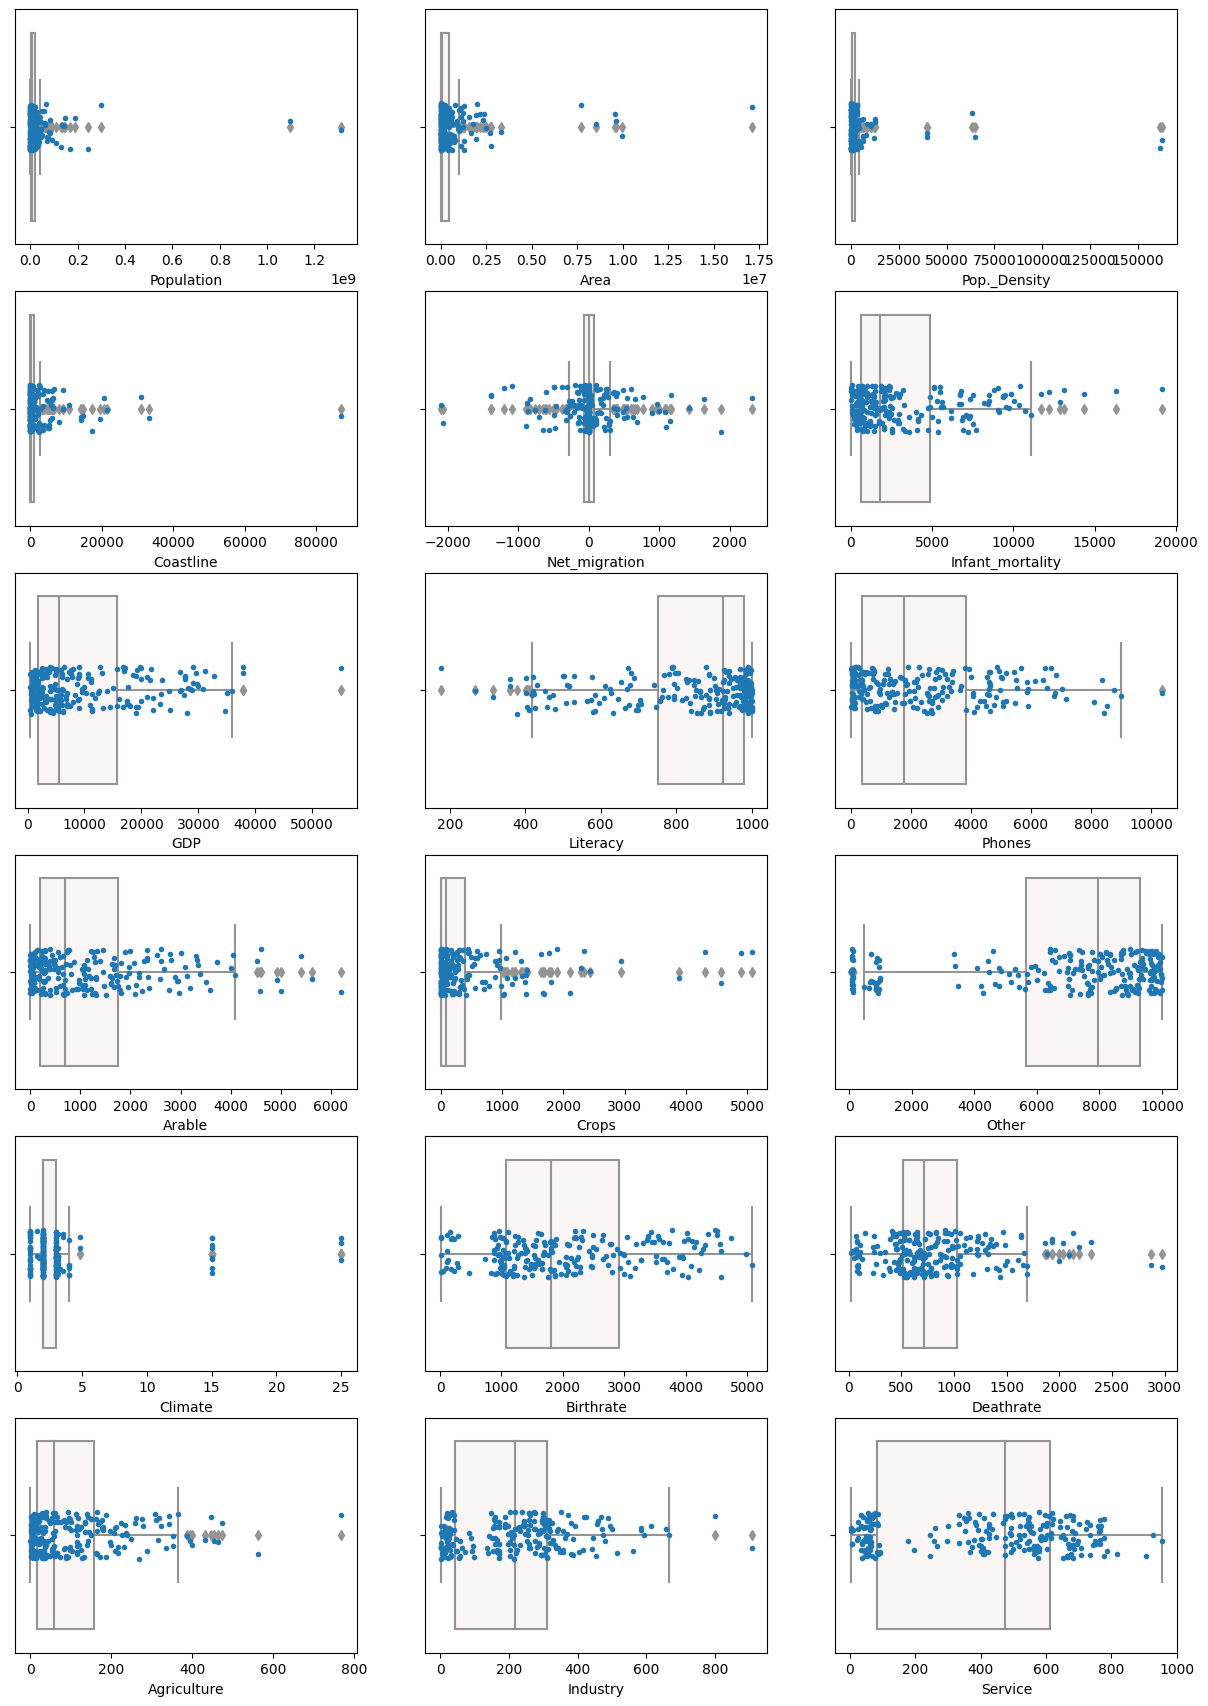

In [12]:
## Prepare the plot 
fig = plt.figure(figsize = (15,25))

for i, col in enumerate(numeric_cols):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.boxplot(x = countries[col], ax = ax, palette = 'vlag')
    sns.stripplot(x = countries[col], ax = ax, size = 4, linewidth = 0)

To get a better sense of the distribution, we can plot the histogram and the density. For some models, there would be distributional assumptions, especially for the outcome variable 

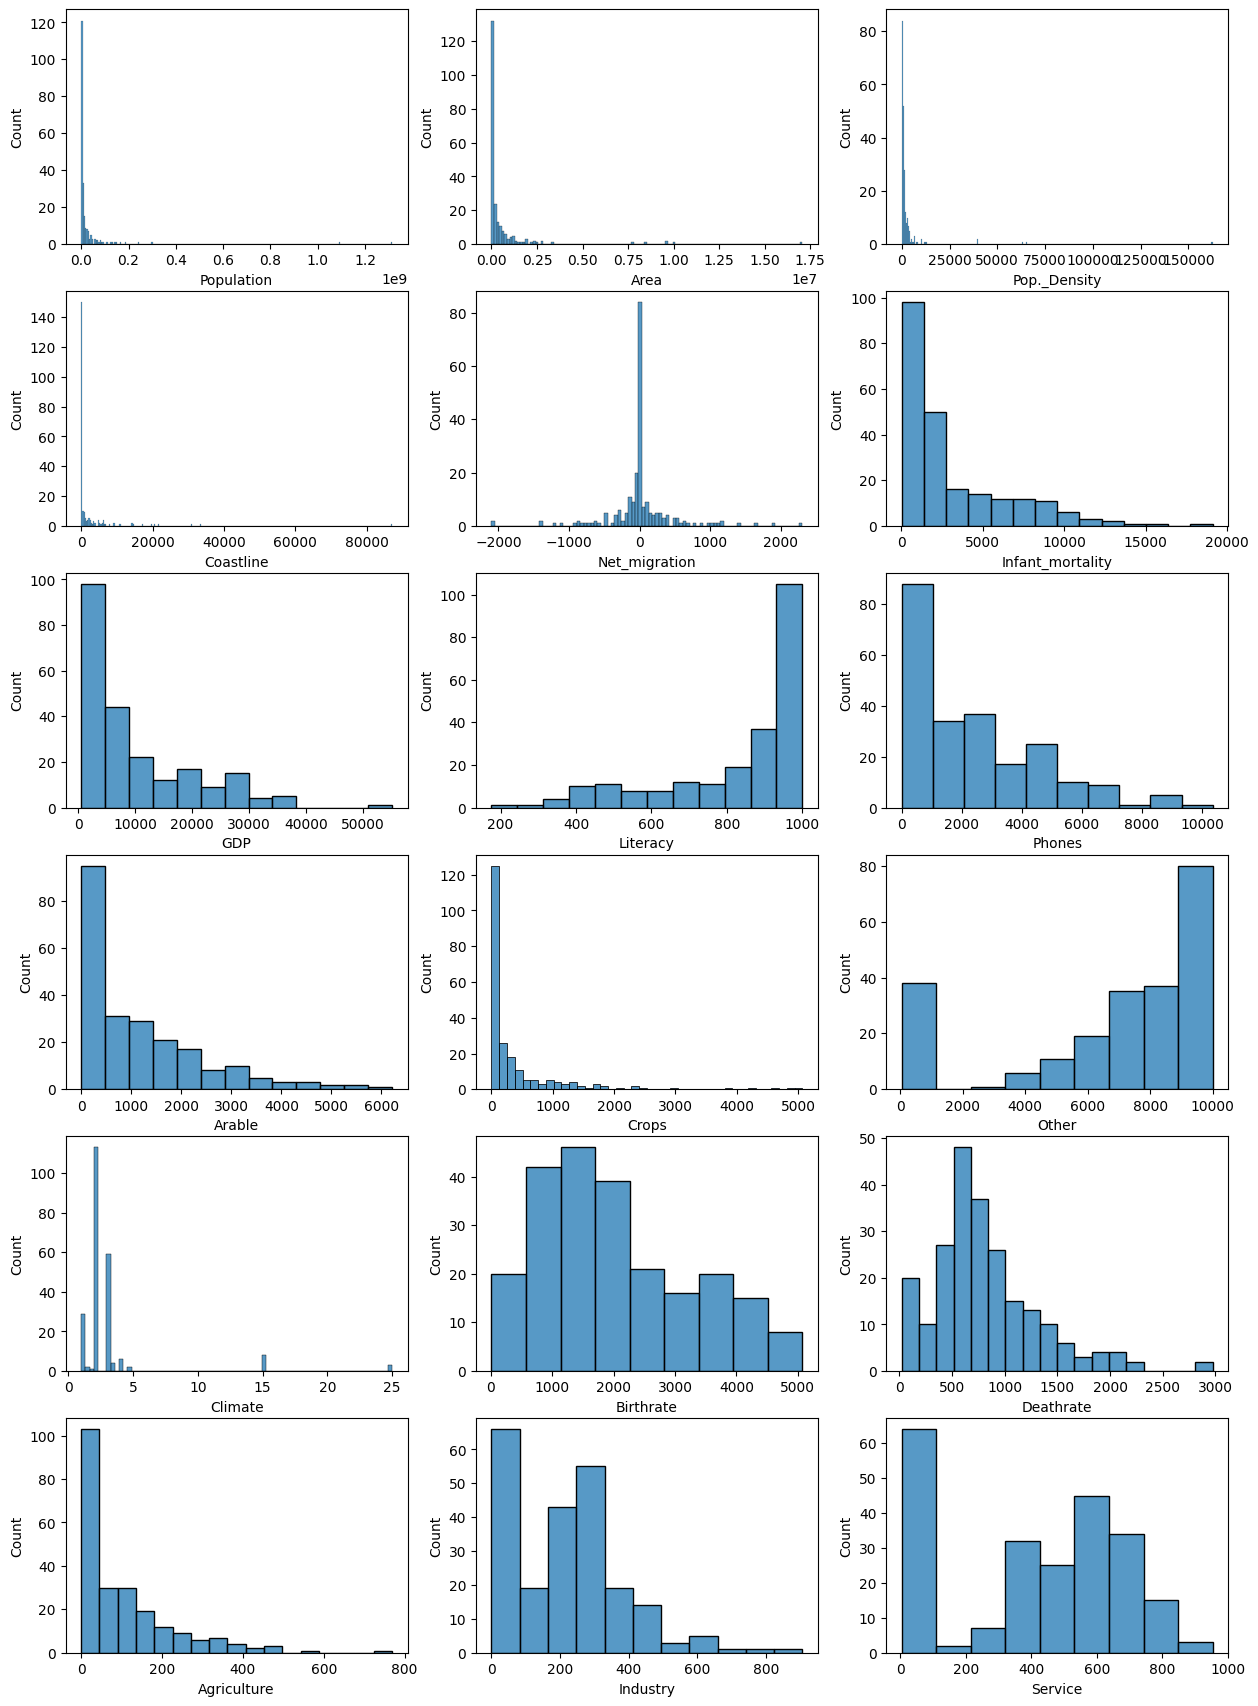

In [13]:
## Prepare the plot 
fig = plt.figure(figsize = (15,25))

for i, col in enumerate(numeric_cols):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.histplot(x = countries[col], ax = ax)

In [14]:
numeric_cols

Index(['Population', 'Area', 'Pop._Density', 'Coastline', 'Net_migration',
       'Infant_mortality', 'GDP', 'Literacy', 'Phones', 'Arable', 'Crops',
       'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')

### Explore some anomalies 

#### Net migration outliers

In [15]:
## Net migration 
top_migration = countries.sort_values("Net_migration", ascending = False).head(3)[['Country', 'Net_migration']]
bottom_migration = countries.sort_values("Net_migration", ascending = False).tail(3)[['Country', 'Net_migration']]

top_btm_migr_df = pd.concat([top_migration, bottom_migration], axis = 0)
print(top_btm_migr_df)

top_btm_migr_countries_list = top_btm_migr_df.Country.to_list()

                  Country  Net_migration
0             Afghanistan         2306.0
38         Cayman Islands         1875.0
166                 Qatar         1629.0
81                Grenada        -1392.0
3          American Samoa        -2071.0
136  Micronesia, Fed. St.        -2099.0


In [16]:
## A closer look at these countries

## Get the percentiles
percentiles_df = countries.rank(pct=True)[numeric_cols]
percentiles_df['Country'] = countries.Country

## Get percentiles
percentiles_df[percentiles_df.Country.isin(top_btm_migr_countries_list)][['Country', 'Net_migration','GDP', 'Literacy', 'Infant_mortality', 'Birthrate', 'Deathrate', 'Agriculture']].sort_values('Net_migration', ascending=False)

,Country,Net_migration,GDP,Literacy,Infant_mortality,Birthrate,Deathrate,Agriculture
0,Afghanistan,1.000000,0.046256,0.022026,0.995595,0.088106,0.973568,0.427313
38,Cayman Islands,0.995595,0.982379,0.764317,0.325991,0.325991,0.233480,0.229075
166,Qatar,0.991189,0.854626,0.325991,0.511013,0.431718,0.202643,0.059471
81,Grenada,0.013216,0.469163,0.764317,0.453744,0.629956,0.475771,0.475771
3,American Samoa,0.008811,0.610132,0.656388,0.352423,0.643172,0.123348,0.656388
136,"Micronesia, Fed. St.",0.004405,0.268722,0.442731,0.687225,0.682819,0.211454,0.907489


### Infant mortality 

In [17]:
top_infant_mort = countries.sort_values("Infant_mortality", ascending = False).head(3)[['Country', 'Infant_mortality']]
bottom_infant_mort = countries.sort_values("Infant_mortality", ascending = False).tail(3)[['Country', 'Infant_mortality']]

top_btm_infmort_df = pd.concat([top_infant_mort, bottom_infant_mort], axis = 0)
print(top_btm_infmort_df)

## Selected countries
top_btm_infmort_countries = top_btm_infmort_df.Country.tolist()


          Country  Infant_mortality
5          Angola           19119.0
0     Afghanistan           16307.0
183  Sierra Leone           14364.0
154        Norway              37.0
2         Algeria              31.0
171  Saint Helena              19.0


In [18]:
percentiles_df[percentiles_df.Country.isin(top_btm_infmort_countries)][['Country', 'Infant_mortality','GDP', 'Literacy', 'Birthrate', 'Deathrate', 'Agriculture']].sort_values('Infant_mortality', ascending=False)

,Country,Infant_mortality,GDP,Literacy,Birthrate,Deathrate,Agriculture
5,Angola,1.000000,0.255507,0.052863,0.969163,0.105727,0.607930
0,Afghanistan,0.995595,0.046256,0.022026,0.088106,0.973568,0.427313
183,Sierra Leone,0.991189,0.008811,0.013216,0.986784,0.991189,0.460352
154,Norway,0.013216,0.993392,0.986784,0.277533,0.066079,0.290749
2,Algeria,0.008811,0.526432,0.233480,0.480176,0.193833,0.627753
171,Saint Helena,0.004405,0.312775,0.656388,0.303965,0.440529,0.817181


In [19]:
## Repeat for the other columns -- get the top and bottom countries regarding each variable
remaining_numeric = [col for col in numeric_cols if col not in ['Net_migration', 'Infant_mortality']]

for column in remaining_numeric: 
    print(column, " anomalies")
    print("====================================================================================")
    print("====================================================================================")
    top_countries = countries.sort_values(column, ascending = False).head(3)[['Country', column]]
    bottom_countries = countries.sort_values(column, ascending = False).tail(3)[['Country', column]]

    ## 
    top_btm = pd.concat([top_countries, bottom_countries], axis = 0)
    print(top_btm)
    print("====================================================================================")
    print("====================================================================================")



Population  anomalies
                  Country  Population
42                  China  1313973713
94                  India  1095351995
214         United States   298444215
140            Montserrat        9439
171          Saint Helena        7502
174  St Pierre & Miquelon        7026
Area  anomalies
           Country      Area
169         Russia  17075200
36          Canada   9984670
214  United States   9631420
144          Nauru        21
78       Gibraltar         7
138         Monaco         2
Pop._Density  anomalies
            Country  Pop._Density
138          Monaco        162715
122           Macau        161830
184       Singapore         64822
139        Mongolia            18
223  Western Sahara            10
80        Greenland             0
Coastline  anomalies
                  Country  Coastline
136  Micronesia, Fed. St.      87066
157                 Palau      33166
153    N. Mariana Islands      31069
170                Rwanda          0
177            San Marino

## Basic bivariate visualisations

We have only two categorical (string, i.e. object type) columns (Country and Region). The rest are numeric 

In [20]:
countries_numeric_only = countries.drop(['Country', 'Region'], axis = 'columns')

corr_matrix = countries_numeric_only.corr()
print(corr_matrix)

                  Population      Area  Pop._Density  Coastline  \
Population          1.000000  0.469985     -0.028190  -0.068199   
Area                0.469985  1.000000     -0.066917  -0.095627   
Pop._Density       -0.028190 -0.066917      1.000000   0.241690   
Coastline          -0.068199 -0.095627      0.241690   1.000000   
Net_migration       0.002400  0.046762      0.177022  -0.140475   
Infant_mortality    0.008984 -0.017336     -0.130429  -0.113211   
GDP                -0.038853  0.072497      0.196099   0.049625   
Literacy           -0.049303  0.029462      0.097432   0.127801   
Phones             -0.029876  0.054151      0.280596   0.153218   
Arable              0.015950 -0.085866     -0.067870  -0.125827   
Crops              -0.051831 -0.132251     -0.025788   0.344830   
Other               0.016175  0.156976     -0.232562  -0.188772   
Climate             0.438492  0.141590     -0.025110  -0.067091   
Birthrate          -0.036125 -0.053244     -0.132340  -0.04843

In [21]:
## Mask the upper triangle of the correlation matrix so that we can focus on unique pairs
ones_matrix = np.ones_like(corr_matrix, dtype=bool) ## Set to boolean (i.e. 1s to True, 0s to False)
#print(ones_matrix)

## Get the upper triangle of the boolean matrix
upper_tri = np.triu(ones_matrix)
#print(upper_tri[0:5])


<Axes: >

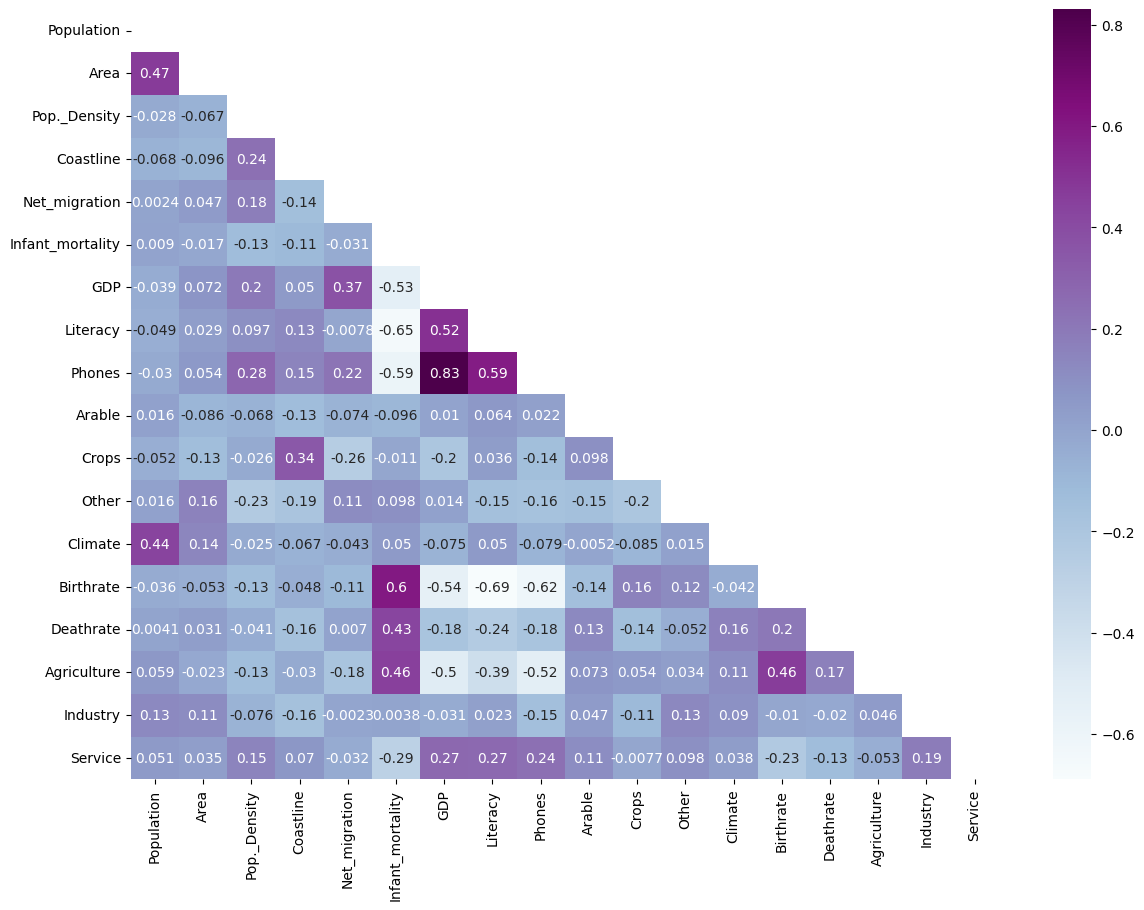

In [22]:
## Visualise 
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, cmap='BuPu', annot=True,
            mask = upper_tri)

Here we can easily see the correlation coefficient for all pairs of variables. This allows us to 

* See which predictors are correlated highly with GDP (our main outcome)
* See which predictors are closely related to one another (issue of multicollinearity for linear models )


 Keep in mind that this is only the correlation coefficient which is inherently limited, i.e. it doesn't show us if the true relationship is polynomial or something else, but only measures the extent to which it resembles linearity. 

Plotting out the scatterplot would be a safer thing to do.

## Multicollinearity: related variables?

### Variables that are related to agriculture: Crops, Agriculture, Arable

Before moving on, we notice that there are whitespaces in our strings, therefore we remove the trailing whitespaces

In [23]:
countries.Country = countries.Country.str.strip()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Checking multicollinearity within agriculture-related predictors')

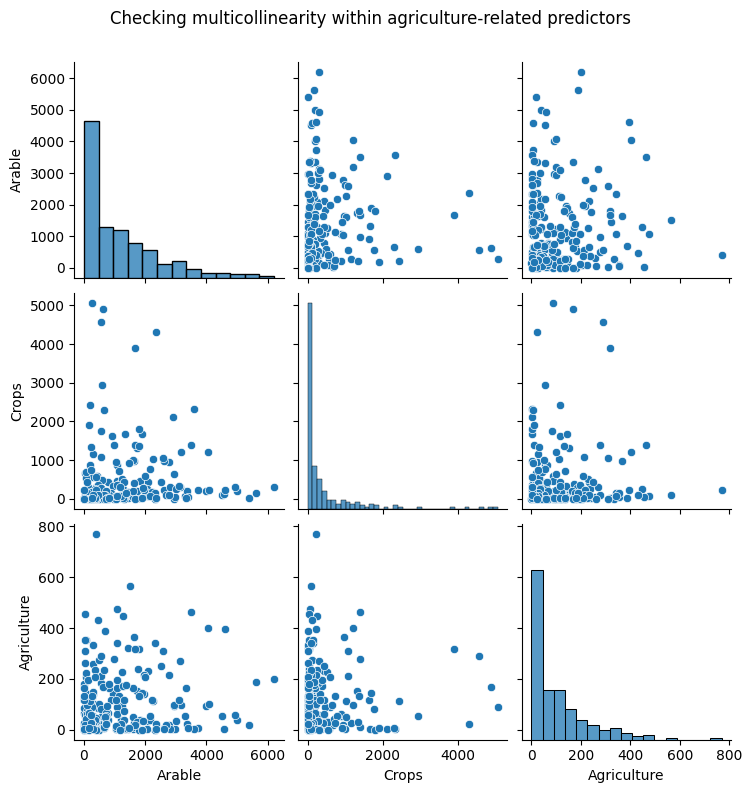

In [24]:
agri_pairs = sns.pairplot(countries[['Arable', 'Crops', 'Agriculture']])
agri_pairs.fig.suptitle("Checking multicollinearity within agriculture-related predictors", y = 1.05)

They do not look too linearly correlated. 

### Variables relating to industry of a country: Industry, Agriculture, Service 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Checking multicollinearity within industry-related predictors')

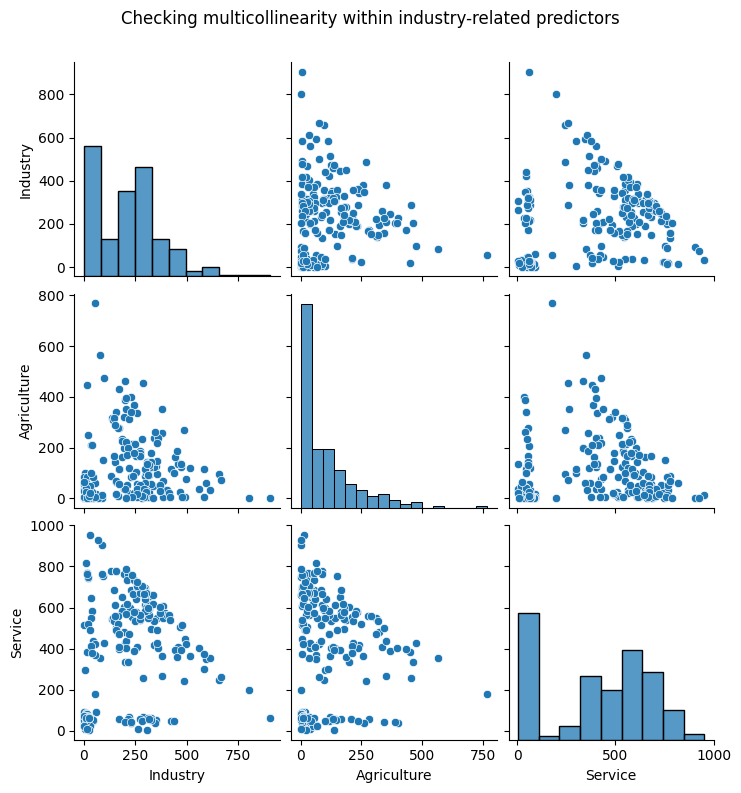

In [25]:
indus_pairs = sns.pairplot(countries[['Industry', 'Agriculture', 'Service']])
indus_pairs.fig.suptitle("Checking multicollinearity within industry-related predictors", y = 1.05)

Let's take a closer look 

Text(0.5, 1.02, 'Agriculture vs. Industry')

<Figure size 300x300 with 0 Axes>

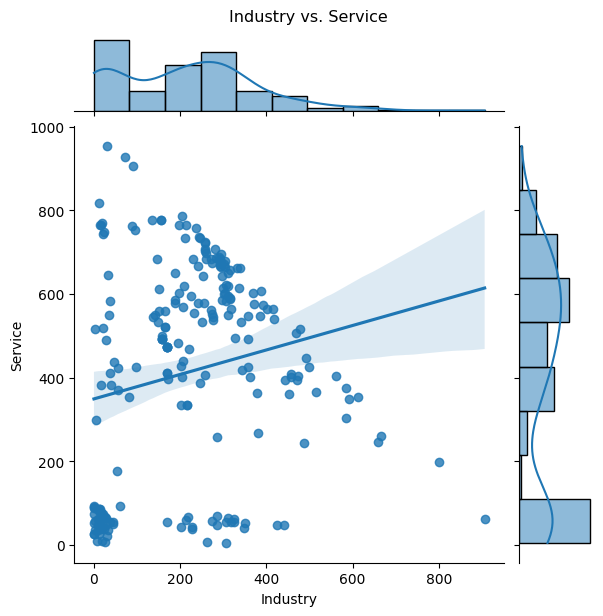

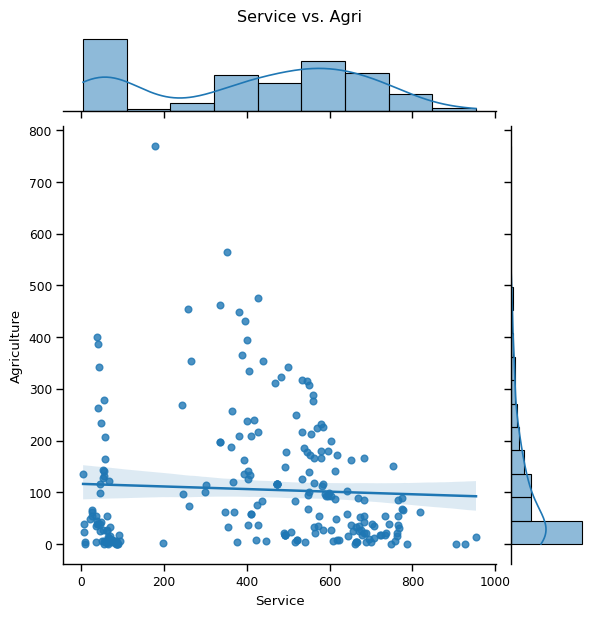

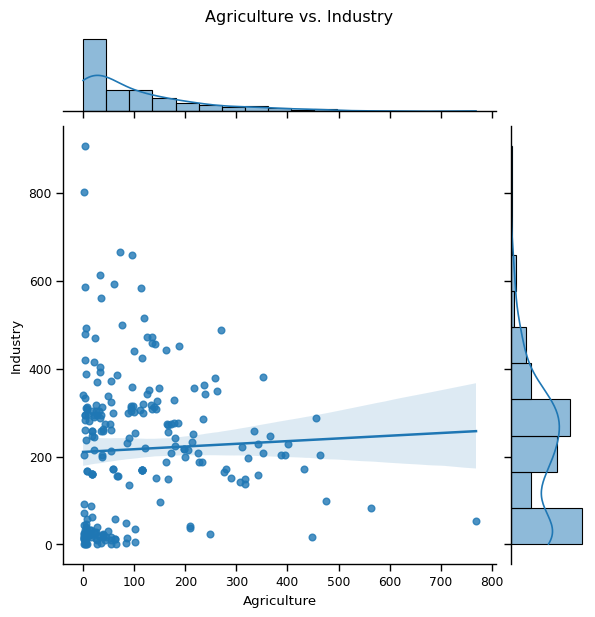

In [26]:
## Reduce plot sizes 
plt.figure(figsize=(3,3))

# Joint plot for Industry vs. GDP
sns.jointplot(data=countries, x='Industry', y='Service', kind='reg')
sns.set_context("paper", rc={"figure.figsize": (3, 3)})
plt.suptitle('Industry vs. Service', y=1.02)

# Joint plot for Service vs. GDP
sns.jointplot(data=countries, x='Service', y='Agriculture', kind='reg')
plt.suptitle('Service vs. Agri', y=1.02)

# Joint plot for Agriculture vs. GDP
sns.jointplot(data=countries, x='Agriculture', y='Industry', kind='reg')
plt.suptitle('Agriculture vs. Industry', y=1.02)

There are no clear-cut linear relationships between them, so it should not represent an issue. 

### Variables relating to industry of a health and demographics: Infant mortality, birthrate, deathrate

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Checking multicollinearity within health/demographic-related predictors')

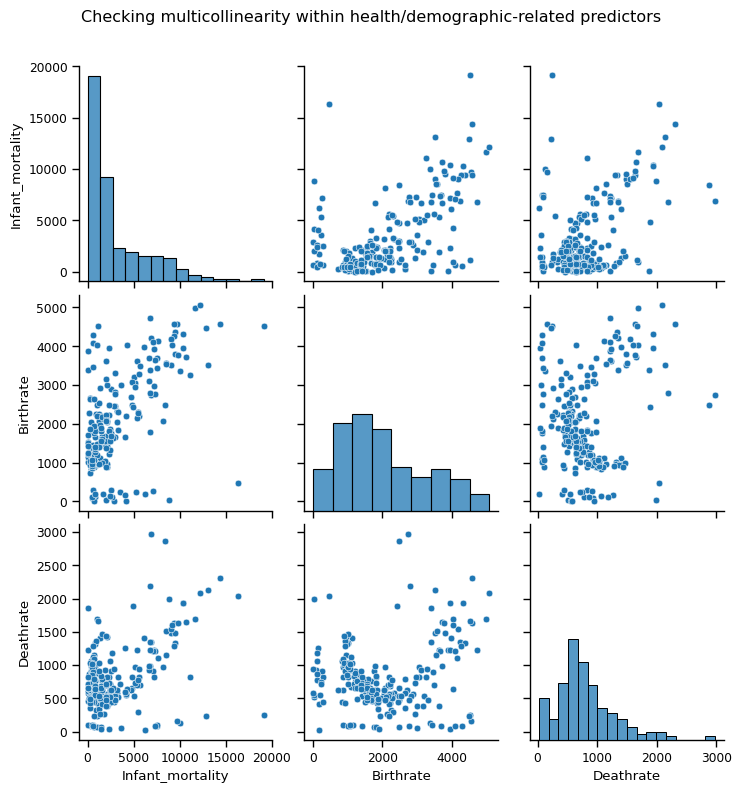

In [27]:
health_dem_pairs = sns.pairplot(countries[['Infant_mortality', 'Birthrate', 'Deathrate']])
health_dem_pairs.fig.suptitle("Checking multicollinearity within health/demographic-related predictors", y = 1.05)

In [28]:
corr_matrix_health_demog = countries[['Infant_mortality', 'Birthrate', 'Deathrate']].corr()
print(corr_matrix_health_demog)

                  Infant_mortality  Birthrate  Deathrate
Infant_mortality          1.000000   0.603431   0.429622
Birthrate                 0.603431   1.000000   0.201894
Deathrate                 0.429622   0.201894   1.000000


Compared to the previous pair plots, the linear relationships here are the most clear. The positive correlation between birthrate and infant mortality makes sense, since when there are more babies being born there is a higher upper limit to the number that may pass away. Since infant mortality is part of death rate, it is also naturally positively correlated with it, but merely a subset of the total death rate since it would include people of other ages. The correlation coefficients are not too high (the highest being 0.63), so it is okay for the time being.

### Checking the VIF: Variance Inflation Factor for multicollinearity

The VIF measures the amount of variance an estimated regression coefficient increases by when the predictors are correlated. 

* VIF = 1 : no multicollinearity
* VIF between 1 and 5 : moderate multicollinearity
* VIF > 5 : high correlation between predictors, strong multicollinearity 

It is measured by the following steps

1. Regress a particular predictor Xi against all other predictors
2. Calculate the R_i^2 of the regression (the higher, the more predictive power the other predictors have on Xi)
3. VIF_i = 1/(1-R_i)^2

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:

## Remove GDP since we are only examining the predictors
numeric_subset_X = countries[numeric_cols].drop('GDP', axis = 1)

## Init an empty dataframe
vif_data = pd.DataFrame()
vif_data['Predictors'] = numeric_subset_X.columns

## Check
print(numeric_subset_X.head())
print(numeric_subset_X.shape)

## Calculate the VIF
vif_data['VIF'] = [variance_inflation_factor(numeric_subset_X, i) for i in range(len(numeric_subset_X.columns))]

   Population     Area  Pop._Density  Coastline  Net_migration  \
0    31056997   647500           480          0         2306.0   
1     3581655    28748          1246        126         -493.0   
2    32930091  2381740           138          4          -39.0   
3       57794      199          2904       5829        -2071.0   
4       71201      468          1521          0           66.0   

   Infant_mortality  Literacy  Phones  Arable  Crops   Other  Climate  \
0           16307.0     360.0    32.0  1213.0   22.0  8765.0      1.0   
1            2152.0     865.0   712.0  2109.0  442.0  7449.0      3.0   
2              31.0     700.0   781.0   322.0   25.0  9653.0      1.0   
3             927.0     970.0  2595.0    10.0   15.0    75.0      2.0   
4             405.0    1000.0  4972.0   222.0    0.0  9778.0      3.0   

   Birthrate  Deathrate  Agriculture    Industry  Service  
0      466.0     2034.0         38.0   24.000000   38.000  
1     1511.0      522.0        232.0  188.00

In [31]:
## Check VIF 
print(vif_data)

          Predictors        VIF
0         Population   1.728437
1               Area   1.537666
2       Pop._Density   1.323514
3          Coastline   1.465818
4      Net_migration   1.223868
5   Infant_mortality   4.156107
6           Literacy  16.272016
7             Phones   5.232627
8             Arable   2.158018
9              Crops   1.798433
10             Other   6.340416
11           Climate   2.340673
12         Birthrate   6.405917
13         Deathrate   5.009724
14       Agriculture   2.755033
15          Industry   3.118704
16           Service   4.494279


Literacy has a very high VIF value, and in usual cases we would remove it from the linear regression. However, looking at VIF is generally a rule of thumb, and not a silver bullet. From some contextual knowledge, literacy reflects the standard of eduation in a country, which is usually a strong predictor of the standard of human labour and knowledge economy, which in turn is a very strong predictor of GDP (although this may be confounded by the 'Service' variable)

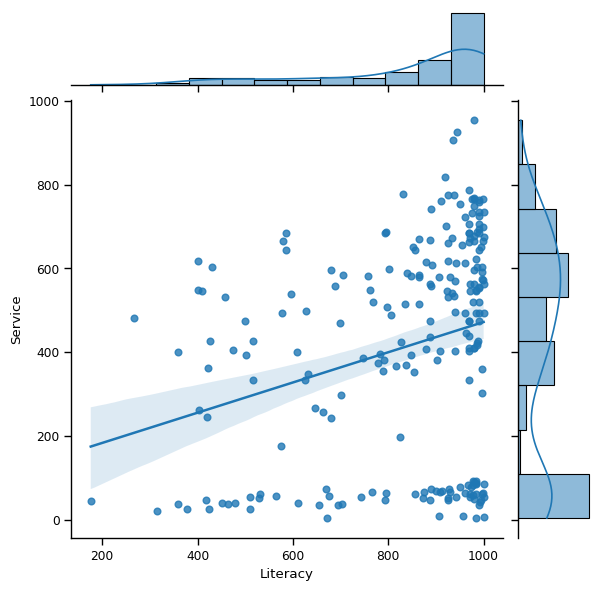

In [32]:
sns.jointplot(data = countries, x = 'Literacy', y = 'Service', kind = 'reg')

## GDP against each predictor

In [33]:
cols = 3
rows = 7

numeric_cols_minus_GDP = numeric_subset_X.columns

/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countries.GDP,
/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countries.GDP,
/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countries.GDP,
/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countries.GDP,
/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countries.GDP,
/tmp/ipykernel_20/3805304285.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = countries[col],y = countri

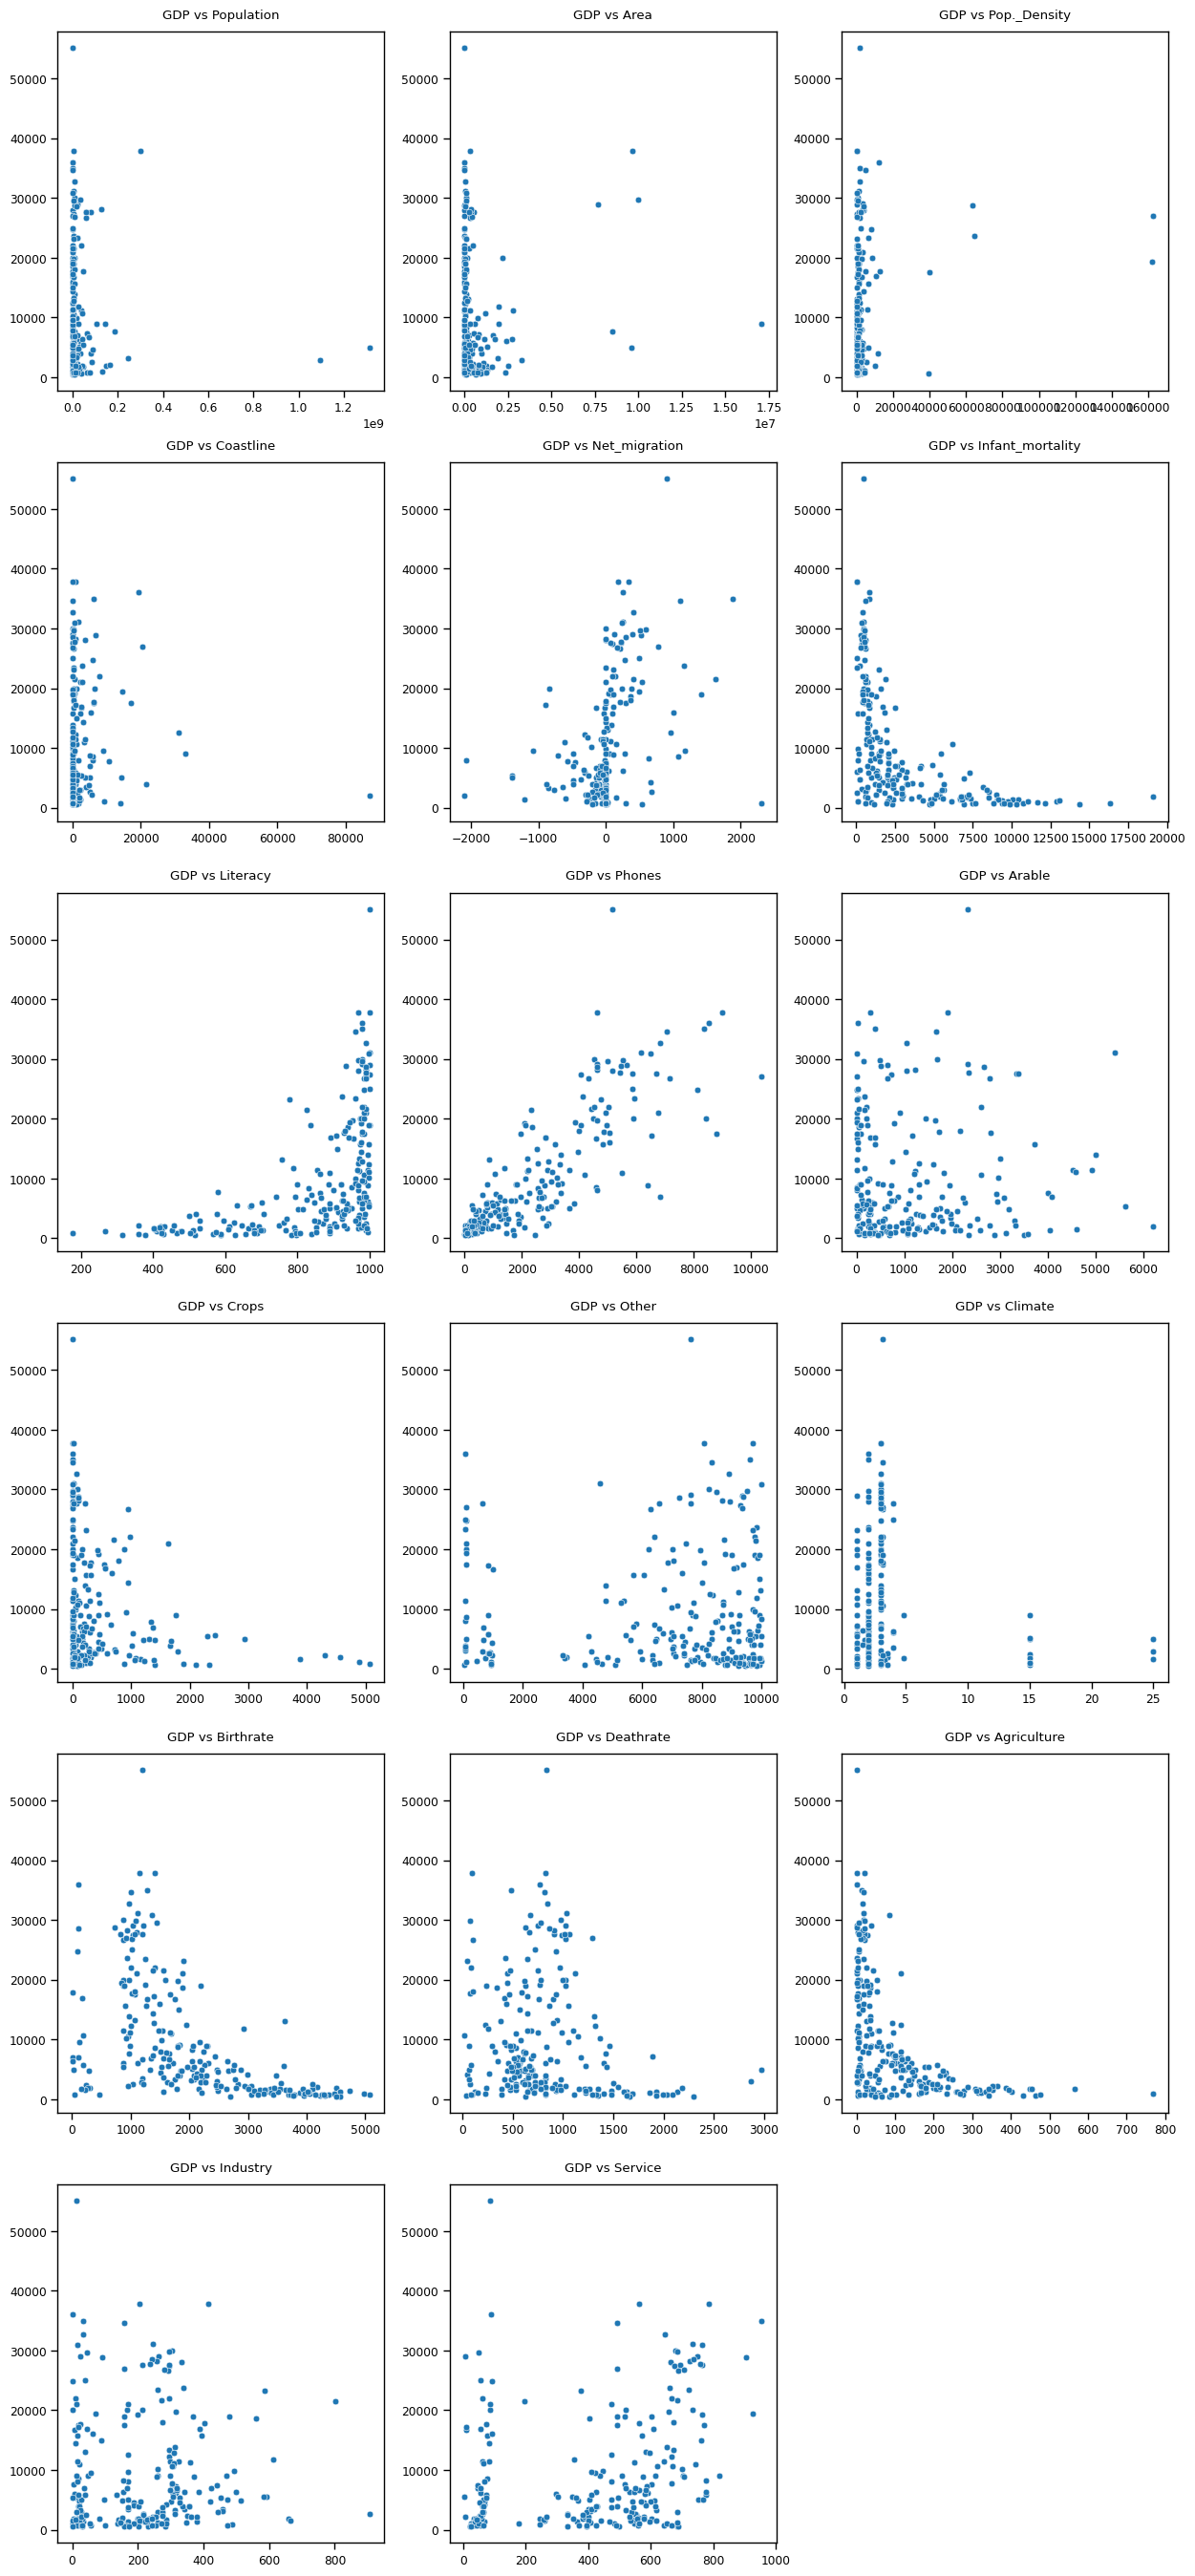

In [34]:
## Prepare the plot 
fig = plt.figure(figsize = (15,40))

for i, col in enumerate(numeric_cols_minus_GDP):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.scatterplot(x = countries[col],y = countries.GDP,
                     ax = ax, palette = 'vlag')
    ax.set_title(f'GDP vs {col}', y= 1.015)
    ax.set_xlabel('')
    ax.set_ylabel('')

Try apply LOG function to predictors 

/tmp/ipykernel_20/4264512553.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]),y = countries.GDP,
/tmp/ipykernel_20/4264512553.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]),y = countries.GDP,
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_20/4264512553.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]),y = countries.GDP,
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_20/4264512553.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterp

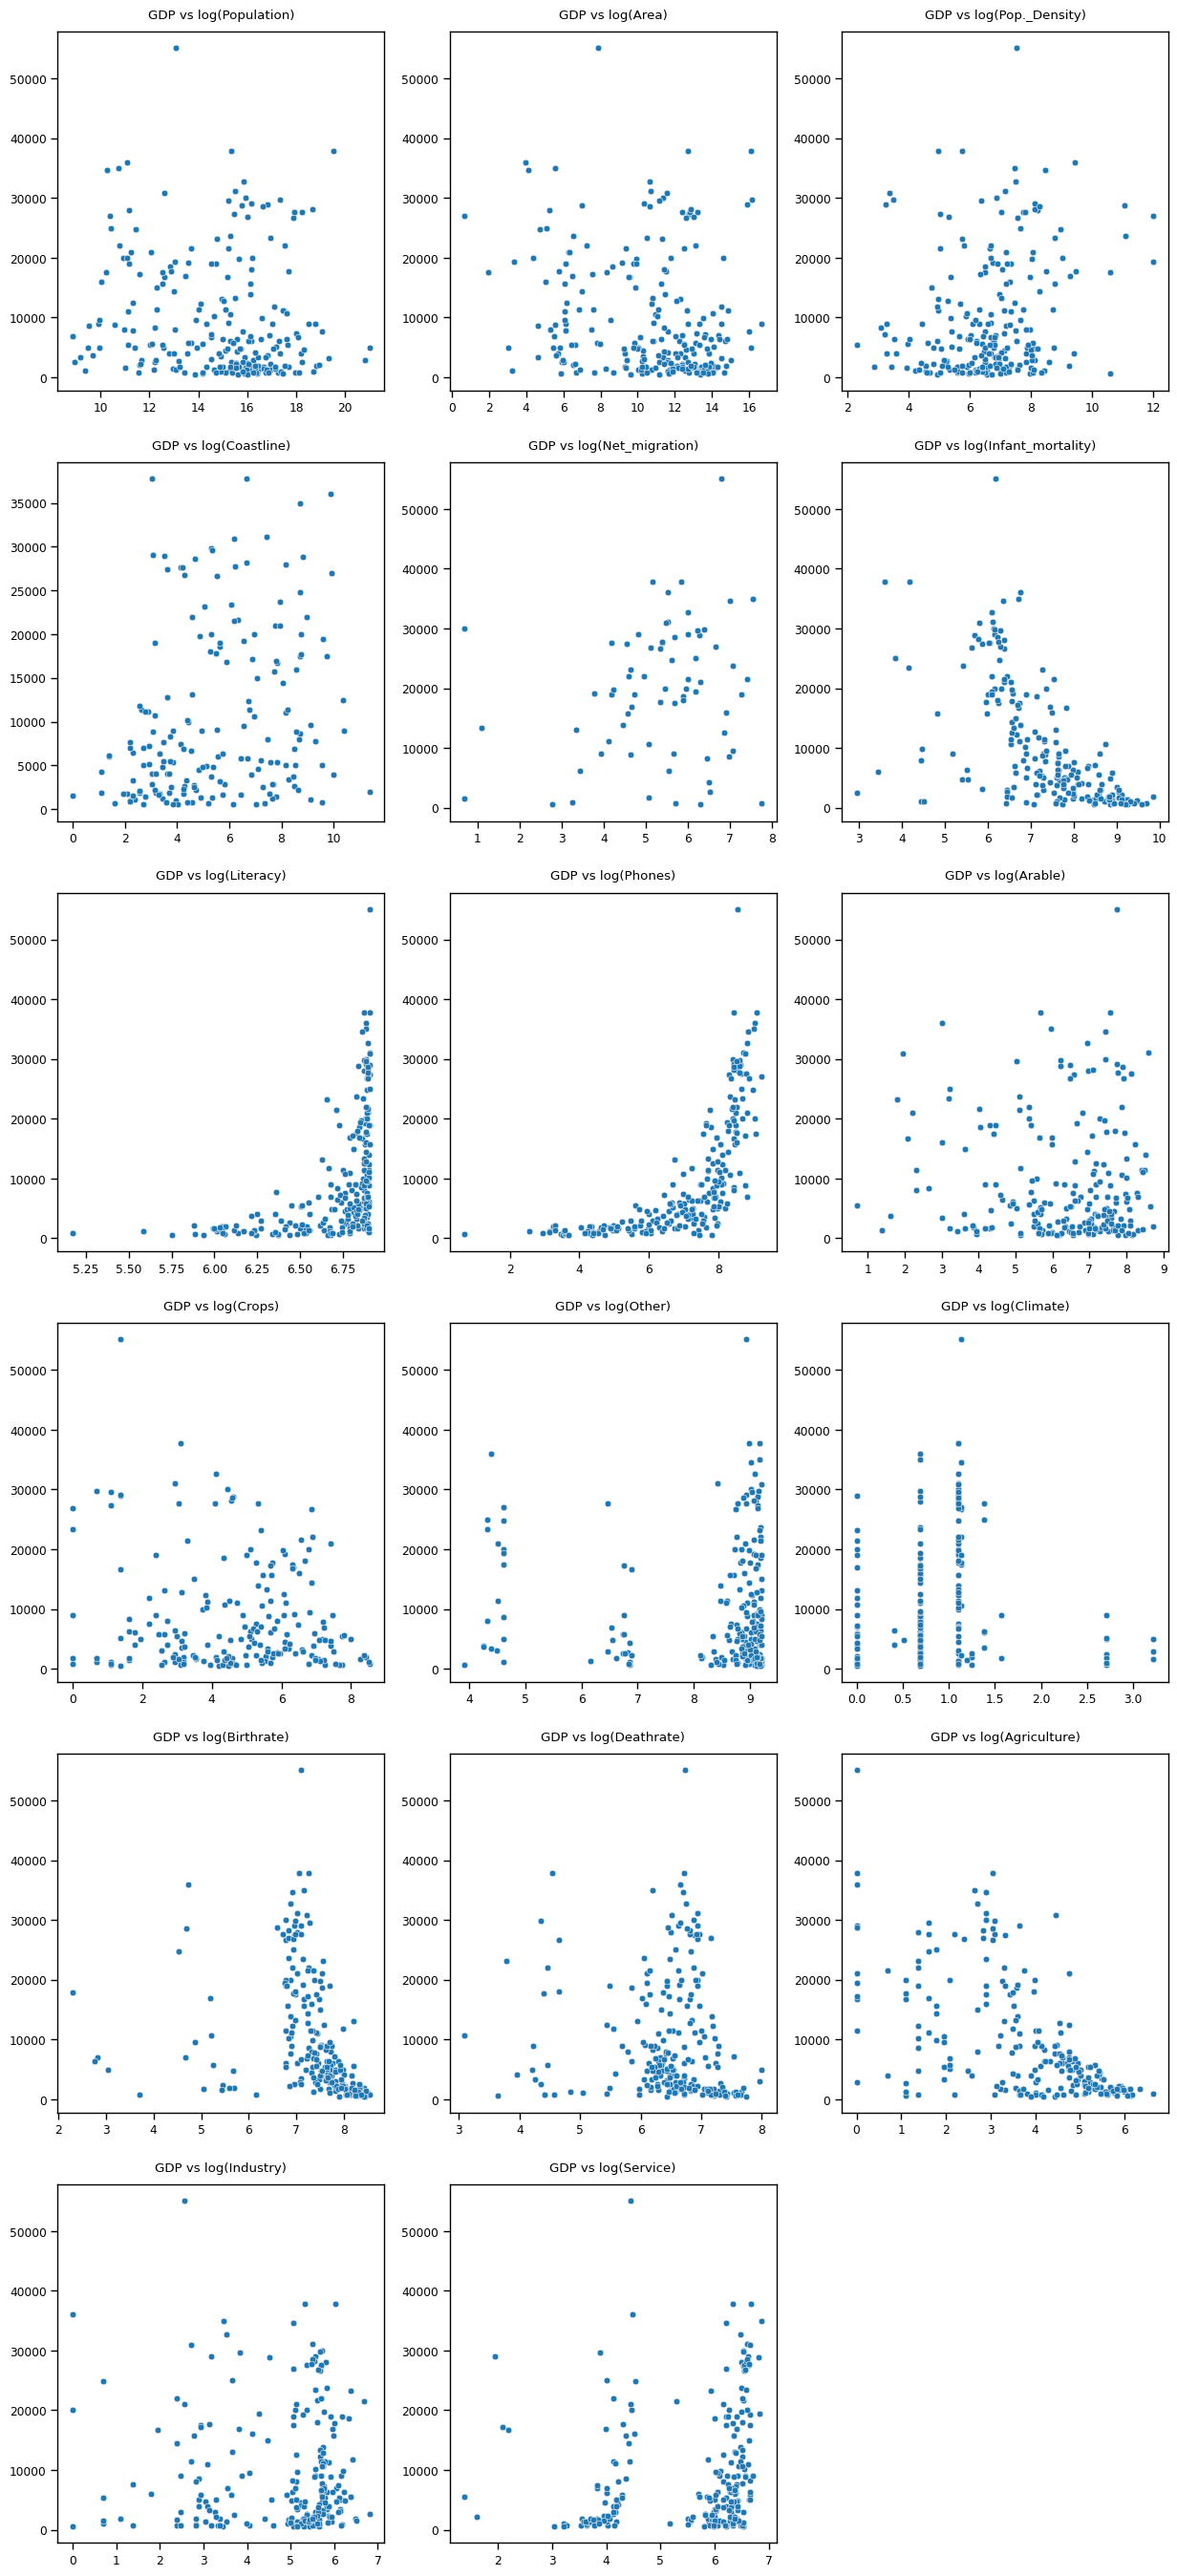

In [35]:
## Prepare the plot 
fig = plt.figure(figsize = (15,40))

for i, col in enumerate(numeric_cols_minus_GDP):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.scatterplot(x = np.log(countries[col]),y = countries.GDP,
                     ax = ax, palette = 'vlag')
    ax.set_title(f'GDP vs log({col})', y= 1.015)
    ax.set_xlabel('')
    ax.set_ylabel('')

Try logging the predictors as well

In [36]:
countries['log_GDP'] = np.log(countries.GDP)

/tmp/ipykernel_20/3928684243.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]) + 1,y = countries.log_GDP,
/tmp/ipykernel_20/3928684243.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]) + 1,y = countries.log_GDP,
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_20/3928684243.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = np.log(countries[col]) + 1,y = countries.log_GDP,
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_20/3928684243.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been 

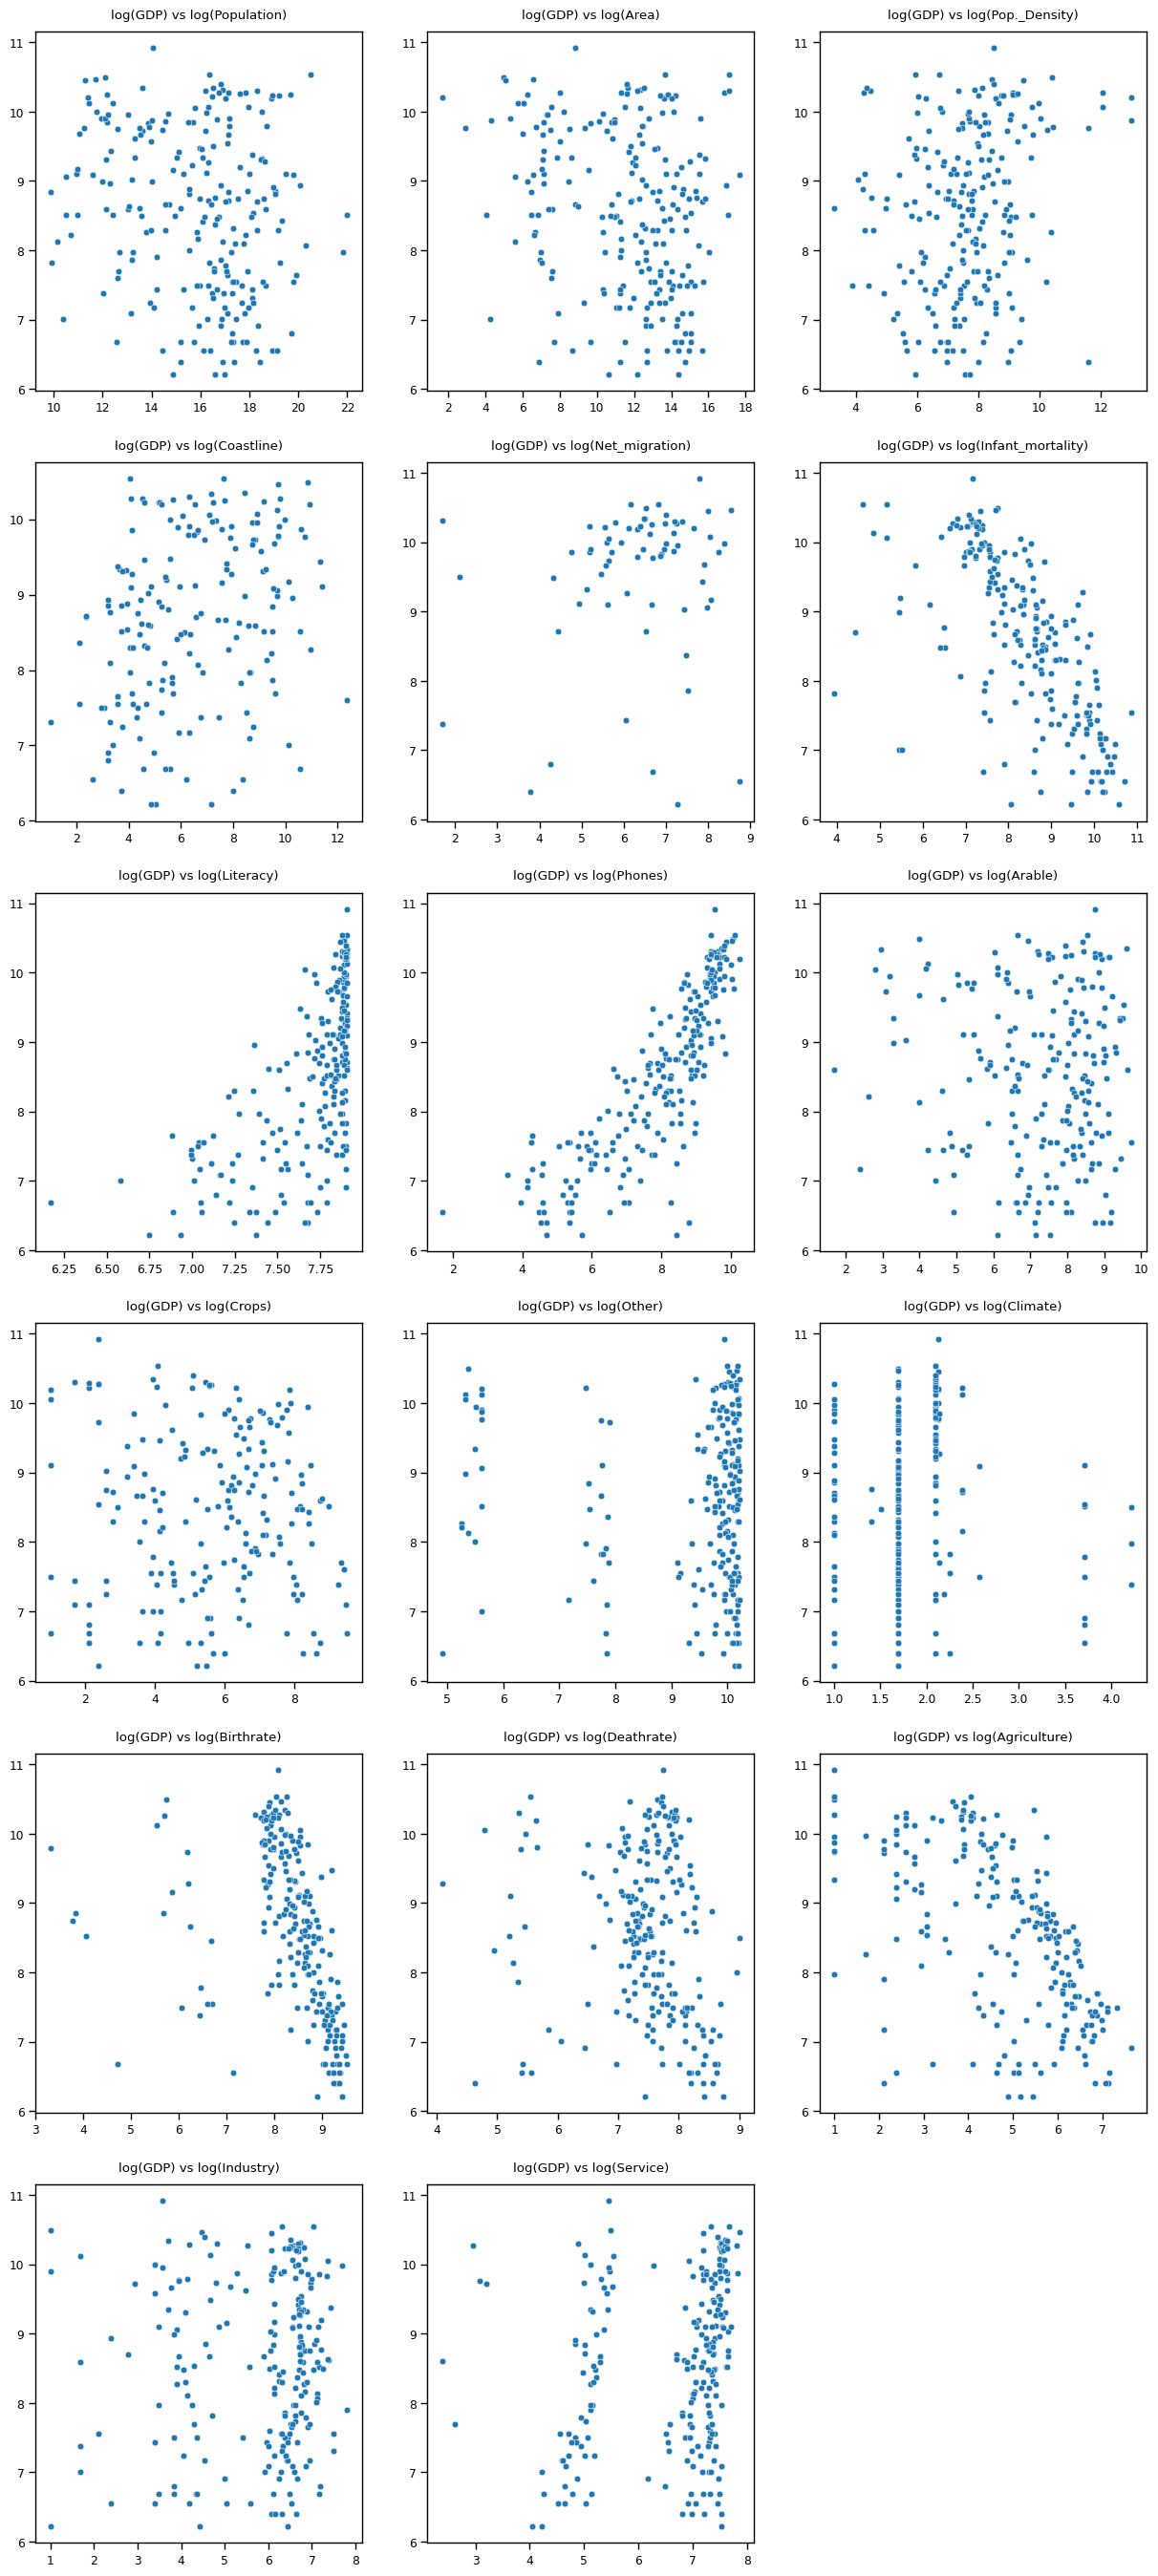

In [37]:
## Prepare the plot 
fig = plt.figure(figsize = (15,40))

for i, col in enumerate(numeric_cols_minus_GDP):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.scatterplot(x = np.log(countries[col]) + 1,y = countries.log_GDP,
                     ax = ax, palette = 'vlag')
    ax.set_title(f'log(GDP) vs log({col})', y= 1.015)
    ax.set_xlabel('')
    ax.set_ylabel('')

Not clear if double-log improves linearity

# Model 1: Full linear model (un-regularised)

In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = countries[numeric_cols_minus_GDP]
y = countries['GDP']

Fitting the entire dataset

In [39]:
full_linear_model = LinearRegression()
full_linear_model.fit(X, y)

LinearRegression()

Get results from **full_linear_model**

In [40]:
print(full_linear_model.score(X,y))
full_linear_model.intercept_

0.7600222562911858


-3069.5644280765355

In [41]:
flm_results = pd.DataFrame({'coeffs' : numeric_cols_minus_GDP, 'values': full_linear_model.coef_})
print(flm_results)

              coeffs    values
0         Population -0.000002
1               Area  0.000038
2       Pop._Density -0.024622
3          Coastline -0.011857
4      Net_migration  4.060636
5   Infant_mortality -0.090404
6           Literacy  2.609604
7             Phones  3.241869
8             Arable  0.113046
9              Crops -0.301253
10             Other  0.293482
11           Climate -5.828001
12         Birthrate  0.144541
13         Deathrate -0.182054
14       Agriculture -4.825683
15          Industry  2.820744
16           Service  2.687028


Using sklearn for linear regression is unfortunately not very comprehensive and not consolidated for getting model results. We try to do the same with statsmodels - which should give us a summary output that is more similar to what we would get with R.

In [42]:
import statsmodels.api as sm

In [43]:
X_with_constant = sm.add_constant(X)
print(X_with_constant.head())
print('No. predictors = ', X_with_constant.shape[1])

   const  Population     Area  Pop._Density  Coastline  Net_migration  \
0    1.0    31056997   647500           480          0         2306.0   
1    1.0     3581655    28748          1246        126         -493.0   
2    1.0    32930091  2381740           138          4          -39.0   
3    1.0       57794      199          2904       5829        -2071.0   
4    1.0       71201      468          1521          0           66.0   

   Infant_mortality  Literacy  Phones  Arable  Crops   Other  Climate  \
0           16307.0     360.0    32.0  1213.0   22.0  8765.0      1.0   
1            2152.0     865.0   712.0  2109.0  442.0  7449.0      3.0   
2              31.0     700.0   781.0   322.0   25.0  9653.0      1.0   
3             927.0     970.0  2595.0    10.0   15.0    75.0      2.0   
4             405.0    1000.0  4972.0   222.0    0.0  9778.0      3.0   

   Birthrate  Deathrate  Agriculture    Industry  Service  
0      466.0     2034.0         38.0   24.000000   38.000  
1 

In [44]:
## Run the model
full_linear_model_sm = sm.OLS(y, X_with_constant).fit()

In [45]:
## View summary
print(full_linear_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     38.94
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.95e-55
Time:                        17:10:51   Log-Likelihood:                -2251.1
No. Observations:                 227   AIC:                             4538.
Df Residuals:                     209   BIC:                             4600.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3069.5644   3255.631  

## Results of full linear model

* We can see that there is a high chance of multicollinearity, as given by the condition value. 

* Both the adjusted and non-adjusted R^2 are high, which means that our predictors capture much of the variance in GDP.

* AIC and BIC here are hard to interpret as standalone values, and need to be used in comparison to other models. 

* The omnibus value indicates that the normality assumption of residuals may be violated.

### Possible solution 1: remove outliers from bivariate visualisation?

From the plots, we could see one stand out point in all the plots -- the highest GDP point that is often anomalous and away from the general trend of the plots. This could represent an **outlier**.

In terms of predictors, we also see some that stand out, mostly in the first few variables: population, size, pop_density and coastline. These could represent **high leverage points**.

In [46]:
## Remove anomalies

## See highest two points GDP
print(countries.sort_values('GDP', ascending=False).head(2)[['Country', 'GDP']])

## Remove high GDP point 
highest_GDP_index = countries.GDP.idxmax() ## Get index of highest point
print(highest_GDP_index)

## Drop anomaly
countries_2 = countries.drop(index=highest_GDP_index)

## Check
print(countries_2.sort_values('GDP', ascending=False).head(2)[['Country', 'GDP']])



           Country      GDP
121     Luxembourg  55100.0
214  United States  37800.0
121
           Country      GDP
214  United States  37800.0
154         Norway  37800.0


In [47]:
## Remove high leverage points

## Pop high leverage
pop_remove_idx = countries.nlargest(n = 2, columns='Population').index.tolist()
print(pop_remove_idx)

## Area - 
area_remove_idx = countries.nlargest(n = 1, columns='Area').index.tolist()
print(area_remove_idx)

## Pop density - 
popdens_remove_idx = countries.nlargest(n = 2, columns='Pop._Density').index.tolist()
print(popdens_remove_idx)

## Coastline
coastline_remove_idx = countries.nlargest(n = 1, columns='Coastline').index.tolist()
print(coastline_remove_idx)

## Combine to a set
remove_list = list(set(pop_remove_idx+area_remove_idx+popdens_remove_idx+coastline_remove_idx))


[42, 94]
[169]
[138, 122]
[136]


In [48]:
## Drop the high leverage points from dataset
countries_anomalies_highlev_removed = countries_2.drop(remove_list)

## Check result
countries_anomalies_highlev_removed.shape ## We now have fewer observations

(220, 21)

Rerun the linear regression to check for improvements

In [49]:
## Run the model WITHOUT ANOMALIES AND HIGH LEV POINTS

full_linear_model_sm_2 = sm.OLS(y, X_with_constant).fit()

In [50]:
## View summary
print(full_linear_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     38.94
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.95e-55
Time:                        17:10:52   Log-Likelihood:                -2251.1
No. Observations:                 227   AIC:                             4538.
Df Residuals:                     209   BIC:                             4600.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3069.5644   3255.631  

In [51]:
## Get the training data and the target data
X_anomalies_highlev_removed = countries_anomalies_highlev_removed[numeric_cols_minus_GDP]
y_anomalies_highlev_removed = countries_anomalies_highlev_removed['GDP']

## Add constant 
X_anomalies_highlev_removed = sm.add_constant(X_anomalies_highlev_removed)

In [52]:
## Run the model
full_linear_model_sm_pointsremoved = sm.OLS(y_anomalies_highlev_removed, X_anomalies_highlev_removed).fit()

In [53]:
## View summary
print(full_linear_model_sm_pointsremoved.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     47.72
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.69e-61
Time:                        17:10:52   Log-Likelihood:                -2151.3
No. Observations:                 220   AIC:                             4339.
Df Residuals:                     202   BIC:                             4400.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2971.5418   2879.300  

There are some improvements, but we still look far from normality. 

Let us take a step back and look at the marginal distribution of GDP

Text(0.5, 0.98, 'Full dataset')

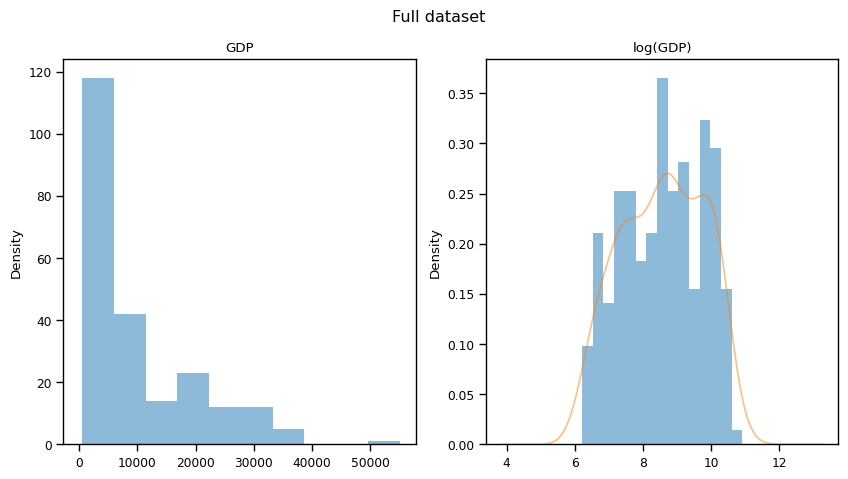

In [54]:
fig, axs = plt.subplots(1,2, figsize = (10, 5))

## Make two plots
countries.GDP.plot.hist(ax = axs[0], bins = 10, density=False, alpha=0.5)
countries.log_GDP.plot.density(ax = axs[0], alpha=0.5)

countries.log_GDP.plot.hist(ax = axs[1], bins = 15, density=True, alpha=0.5)
countries.log_GDP.plot.density(ax = axs[1], alpha=0.5)

## Add two titles
axs[0].set_title("GDP")
axs[1].set_title("log(GDP)")
fig.suptitle("Full dataset")


Text(0.5, 0.98, 'Dataset without anomalies')

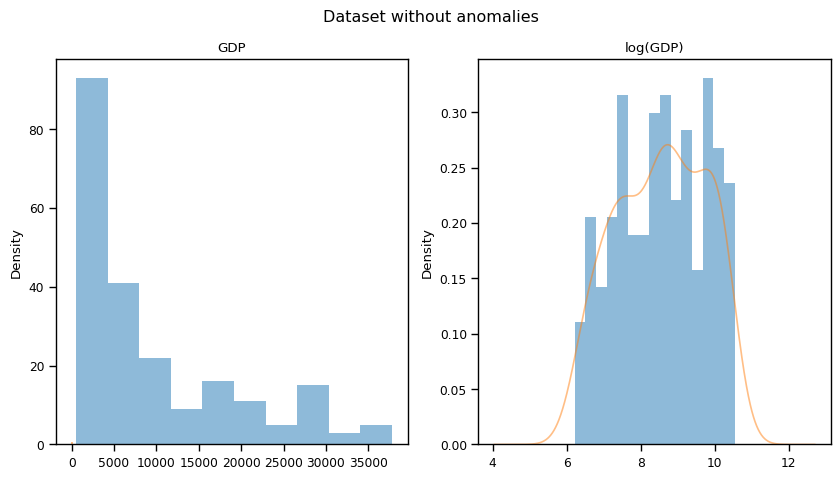

In [55]:
fig, axs = plt.subplots(1,2, figsize = (10, 5))

## Make two plots
countries_anomalies_highlev_removed.GDP.plot.hist(ax = axs[0], bins = 10, density=False, alpha=0.5)
countries_anomalies_highlev_removed.log_GDP.plot.density(ax = axs[0], alpha=0.5)

countries_anomalies_highlev_removed.log_GDP.plot.hist(ax = axs[1], bins = 15, density=True, alpha=0.5)
countries_anomalies_highlev_removed.log_GDP.plot.density(ax = axs[1], alpha=0.5)

## Add two titles
axs[0].set_title("GDP")
axs[1].set_title("log(GDP)")
fig.suptitle("Dataset without anomalies")

## Possible solution 2: applying log to GDP for better normality

Log transformation has the added benefit of also drawing in outliers (Luxembourg) closer to the rest of the values

But the main purpose is to convert our GDP from positive to (potentially) both negative and positive, and also to improve symmetry to be closer to a normal distribution, as seen in the plots above. 

In [56]:
## Run the model
log_y = countries.log_GDP
full_linear_model_sm_logGDP = sm.OLS(log_y, X_with_constant).fit()

In [57]:
print(full_linear_model_sm_logGDP.summary())

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     51.65
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           4.04e-65
Time:                        17:10:55   Log-Likelihood:                -174.93
No. Observations:                 227   AIC:                             385.9
Df Residuals:                     209   BIC:                             447.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.4951      0.347  

### 2.2: Applying log to subset of data without anomalies and high leverage points

In [58]:
## Run the model
log_y_2 = countries_anomalies_highlev_removed.log_GDP
full_linear_model_sm_logGDP_2 = sm.OLS(log_y_2, X_anomalies_highlev_removed).fit()

In [59]:
print(full_linear_model_sm_logGDP_2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     51.10
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.54e-63
Time:                        17:10:56   Log-Likelihood:                -166.88
No. Observations:                 220   AIC:                             369.8
Df Residuals:                     202   BIC:                             430.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.4742      0.348  

It appears that the model with the lowest Omnibus value is still the case where we removed outliers without applying log-transformation to the data. 

## Model 2 : Feature selection based on VIF 

In [60]:
high_vif_subset = vif_data[vif_data.VIF > 5]
print(high_vif_subset)

   Predictors        VIF
6    Literacy  16.272016
7      Phones   5.232627
10      Other   6.340416
12  Birthrate   6.405917
13  Deathrate   5.009724


In [61]:
columns_to_be_removed = high_vif_subset.Predictors.tolist()
print(columns_to_be_removed)

['Literacy', 'Phones', 'Other', 'Birthrate', 'Deathrate']


In [62]:
remaining_columns = [col for col in numeric_cols_minus_GDP if col not in columns_to_be_removed]
print(remaining_columns)
print('Number of remaining columns: ', len(remaining_columns))

['Population', 'Area', 'Pop._Density', 'Coastline', 'Net_migration', 'Infant_mortality', 'Arable', 'Crops', 'Climate', 'Agriculture', 'Industry', 'Service']
Number of remaining columns:  12


In [63]:
## Get the new predictor set
X_feature_selected = countries[remaining_columns]
## Add constant 
X_feature_selected_with_constant = sm.add_constant(X_feature_selected)

## Check 
print(X_feature_selected_with_constant.head().iloc[:,1:8])
print("No. predictors = ", X_feature_selected_with_constant.shape[1])


   Population     Area  Pop._Density  Coastline  Net_migration  \
0    31056997   647500           480          0         2306.0   
1     3581655    28748          1246        126         -493.0   
2    32930091  2381740           138          4          -39.0   
3       57794      199          2904       5829        -2071.0   
4       71201      468          1521          0           66.0   

   Infant_mortality  Arable  
0           16307.0  1213.0  
1            2152.0  2109.0  
2              31.0   322.0  
3             927.0    10.0  
4             405.0   222.0  
No. predictors =  13


In [64]:
## Run the model
feature_selected_linear_model = sm.OLS(y, X_feature_selected_with_constant).fit()

In [65]:
## Print summary
print(feature_selected_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     18.53
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.70e-27
Time:                        17:10:57   Log-Likelihood:                -2332.2
No. Observations:                 227   AIC:                             4690.
Df Residuals:                     214   BIC:                             4735.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.31e+04   1408.208  

Unfortunately, the R^2 and adjusted R^2 took a significant hit, and there is still the presence of multicollinearity with the condition value 3.56 x 10^8. The new F statistic is much smaller as well.

We can use an F test to compare the two (nested) models. 

In [66]:
from statsmodels.stats.anova import anova_lm

## ANOVA F test for nested models
print(anova_lm(feature_selected_linear_model, full_linear_model_sm))

   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     214.0  1.115057e+10      0.0           NaN        NaN           NaN
1     209.0  5.456969e+09      5.0  5.693597e+09  43.612554  1.121303e-30


The F test measures if the additional predictors in the full model are 'worth it', i.e. the null hypothesis is that the additional predictors are statistically insignificant have coefficients = 0. Since the p-value is essentially 0, we reject the null hypothesis in favour of the fuller model. 

## Model 3: Regularisation

### Model 3.1 Ridge Regression 

Ridge regression works by penalising the L2 norm of the parameters, in addition to minimising the sum of squares residual (original cost function) under OLS. This helps to reduce the magnitude of the coefficients to possibly reduce overfitting. 

The degree to which we control the penalty to the L2 norm of the coefficients rests on hyperparameter alpha.
* alpha = 0 : no penalty, same as normal OLS
* alpha = very large value : coefficients are reduced to 0 as the objective function is overwhelmed by the squared norm of the coefficients

In [67]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler


We now standardise the data so that the regularisation is fairer.

In [68]:
## Check X
print(X.head().iloc[1:6])
print(X.mean(axis = "rows"))

## Init and conduct the scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Check 
print("After scaling ======================")
print(pd.DataFrame(X_scaled).head().iloc[1:6])
print("The new column means are")
print(pd.DataFrame(X_scaled).mean(axis="rows"))

   Population     Area  Pop._Density  Coastline  Net_migration  \
1     3581655    28748          1246        126         -493.0   
2    32930091  2381740           138          4          -39.0   
3       57794      199          2904       5829        -2071.0   
4       71201      468          1521          0           66.0   

   Infant_mortality  Literacy  Phones  Arable  Crops   Other  Climate  \
1            2152.0     865.0   712.0  2109.0  442.0  7449.0      3.0   
2              31.0     700.0   781.0   322.0   25.0  9653.0      1.0   
3             927.0     970.0  2595.0    10.0   15.0    75.0      2.0   
4             405.0    1000.0  4972.0   222.0    0.0  9778.0      3.0   

   Birthrate  Deathrate  Agriculture    Industry  Service  
1     1511.0      522.0        232.0  188.000000  579.000  
2     1714.0      461.0        101.0    6.000000  298.000  
3     2246.0      327.0        115.5  169.687500  473.375  
4      871.0      625.0         18.2  159.458333  492.625  
Pop

We refit a linear model, so that we can later compare it with the Lasso and Ridge models to see the changes in coefficients

This time we include a train test split to get the test error.

In [69]:
from sklearn.model_selection import train_test_split

## Get train test split so that we can get test error
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
## Get test error
test_pred = lr.predict(X_test)
test_actual = y_test

## Get train and test scores
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

## See results
print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.7544226821550355
Test score:  0.7849863389629594


Now, for the Ridge Regression 
* Start with alpha = 5

In [71]:
## Init
ridge_reg = Ridge(alpha = 5)
## Fit 
ridge_reg.fit(X_train, y_train)
## Get scores
train_score_rr = ridge_reg.score(X_train, y_train)
test_score_rr = ridge_reg.score(X_test, y_test)
## See results 
print("Ridge Reg Train score: ", train_score_rr)
print("Ridge Reg Test score: ", test_score_rr)

Ridge Reg Train score:  0.7537403131833917
Ridge Reg Test score:  0.7814002368639044


There seems to be small differences for this value of alpha.

Let us see the differences in the estimated coefficients.

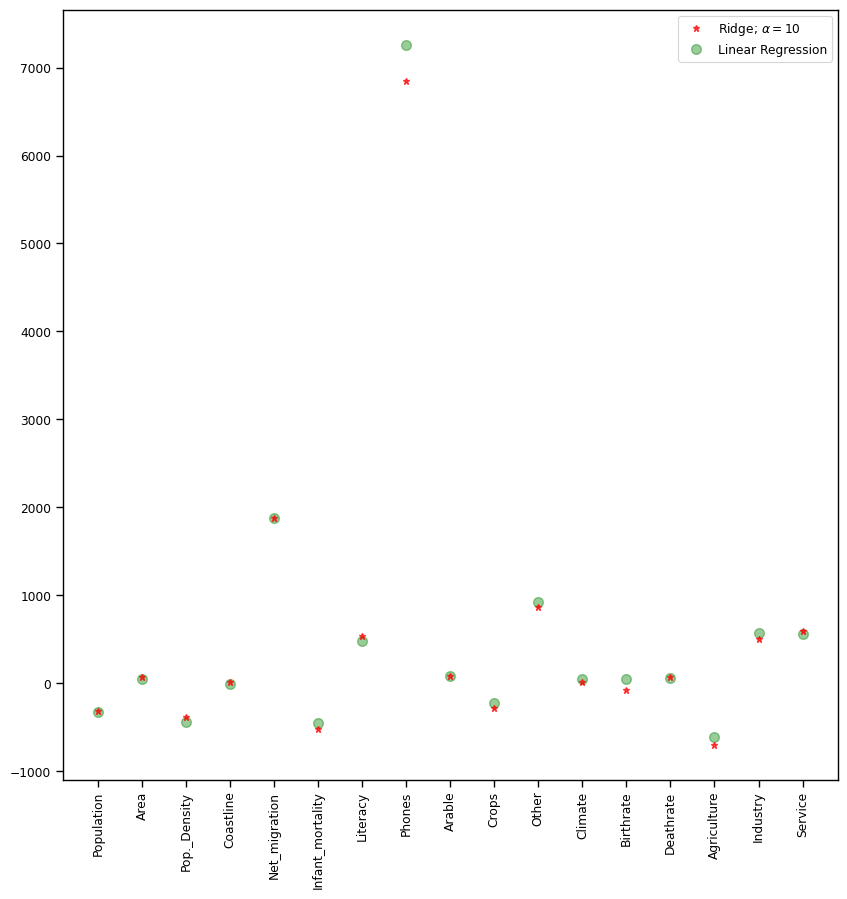

In [72]:
plt.figure(figsize = (10, 10))
plt.plot(numeric_cols_minus_GDP,ridge_reg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(numeric_cols_minus_GDP,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


Apart from phones, which is the largest coefficient and hence potentially one of the leading indicators of GDP, we don't see great regularisation of coefficients. 

### Hyperparameter tuning

We use cross-validation to determine the best value of alpha to use. This process involves testing out different values of alpha and seeing which is the best (e.g. gives the lowest error) via a validation set. 

The RidgeCV uses a leave-one-out method

In [73]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]).fit(X_train, y_train)

See results of the tuning

In [74]:
print("The best alpha is ", ridge_cv.alpha_)
print("The best train score is ", ridge_cv.score(X_train, y_train))
print("The best test score is ", ridge_cv.score(X_test, y_test))

The best alpha is  10.0
The best train score is  0.7520496643073743
The best test score is  0.7766570588173087


### Model 3.2 Lasso Regression 

Lasso has the benefit of doing automatic selection. Since it penalises the L1 norm instead, it will shrink the coefficient of non-relevant predictors to 0, essentially performing feature selection for us (this depends on the alpha value, again).

In [75]:
lasso_reg = Lasso(alpha=10) ## Start with 10 again, later we will tune 
## Fit the model 
lasso_reg.fit(X_train, y_train)
## Get scores 
print("Train score is ", lasso_reg.score(X_train, y_train))
print("Test score is ", lasso_reg.score(X_test, y_test))

Train score is  0.7544003737724202
Test score is  0.7852966123791189


Visualise the coefficients 

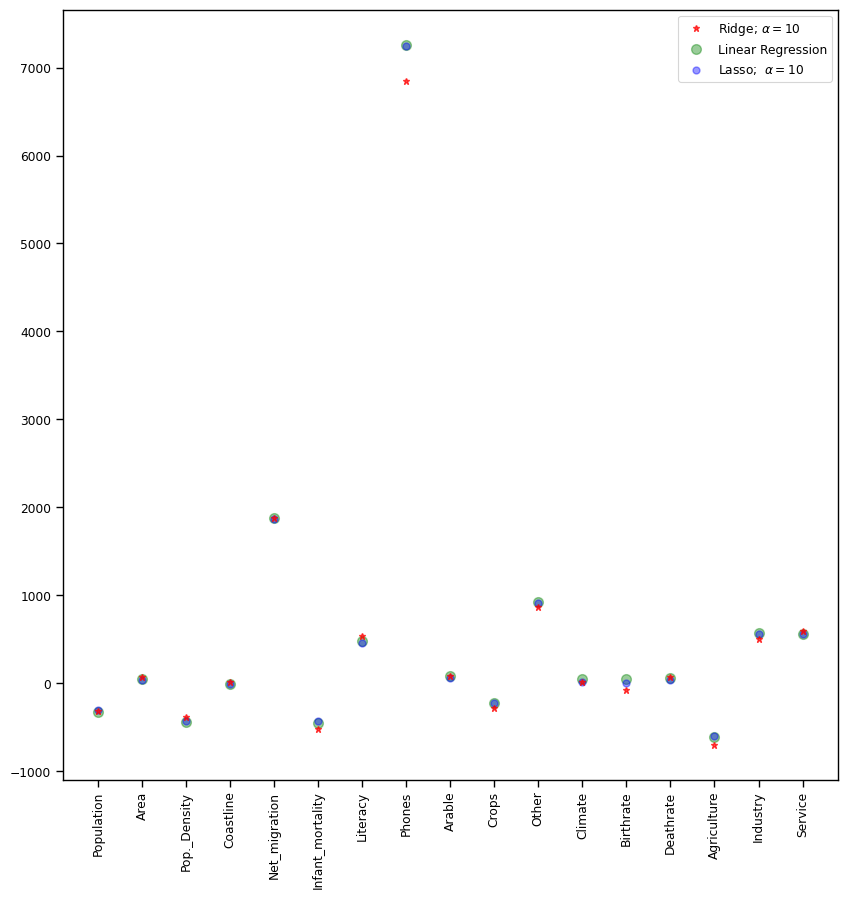

In [76]:
plt.figure(figsize = (10, 10))
plt.plot(numeric_cols_minus_GDP,ridge_reg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(numeric_cols_minus_GDP,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(numeric_cols_minus_GDP,lasso_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=5,color='blue',label=r'Lasso;  $\alpha = 10$')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


Lets remove the phone coefficient so that we can examine the rest more clearly

In [77]:
coefficients_df = pd.DataFrame({'Coeffs' : numeric_cols_minus_GDP,
                                'Linear Model' : lr.coef_,
                                'Ridge Model' : ridge_reg.coef_,
                                'Lasso Model' : lasso_reg.coef_,
                                })

coeff_no_phones = coefficients_df[coefficients_df.Coeffs != 'Phones']


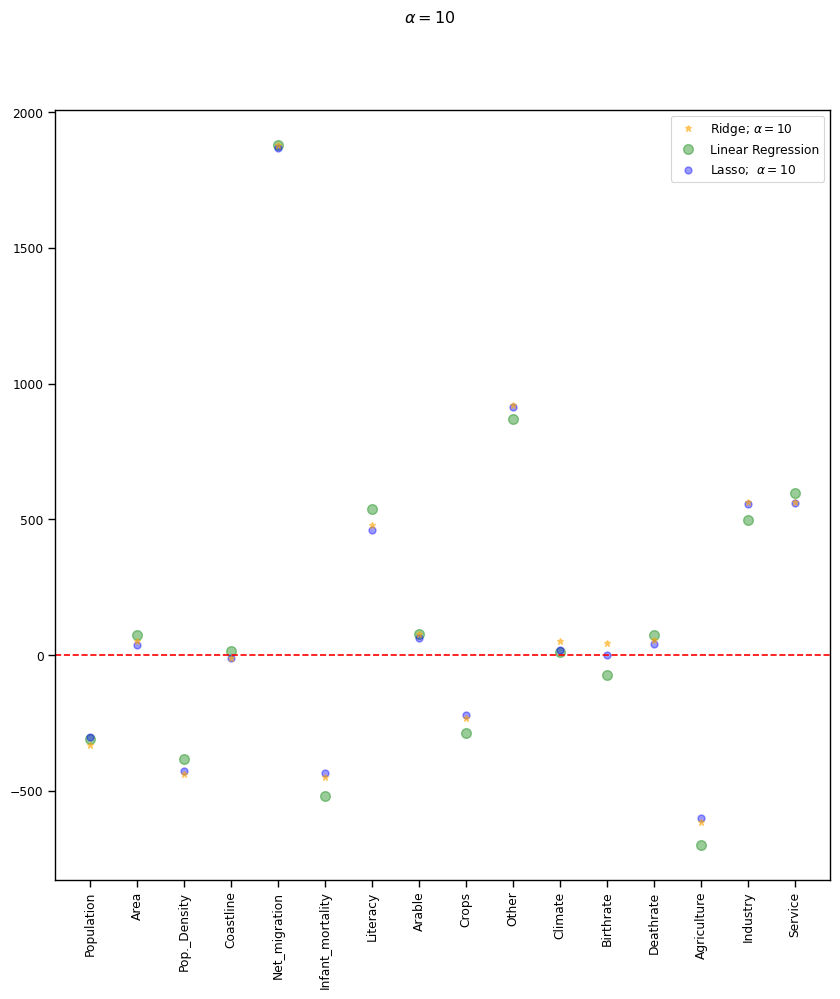

In [78]:
plt.figure(figsize = (10, 10))
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Linear Model'],alpha=0.5,linestyle='none',marker='*',markersize=5,color='orange',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Ridge Model'],alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Lasso Model'],alpha=0.4,linestyle='none',marker='o',markersize=5,color='blue',label=r'Lasso;  $\alpha = 10$')
plt.xticks(rotation = 90)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.suptitle(r"$\alpha = 10$")
plt.legend()
plt.show()


In [79]:
coefficients_df[coefficients_df['Lasso Model'] == 0]

,Coeffs,Linear Model,Ridge Model,Lasso Model
12,Birthrate,44.41361,-74.065879,0.0


We can see that only one variable was zero-ed out, which is birthrate. 

### Hyperparameter tuning 

In [80]:
lasso_cv = LassoCV(alphas=[0.001,0.01,0.1,1,10,100,1000]).fit(X_train, y_train)

In [81]:
print("Best alpha ", lasso_cv.alpha_)
print("Best train score ", lasso_cv.score(X_train, y_train))
print("Best test score ", lasso_cv.score(X_test, y_test))

Best alpha  1000.0
Best train score  0.714591027369461
Best test score  0.741190265973728


In [82]:
coefficients_df['Lasso alpha = 1000'] = lasso_cv.coef_
coeff_no_phones = coefficients_df[coefficients_df.Coeffs != 'Phones']
print(coefficients_df)


              Coeffs  Linear Model  Ridge Model  Lasso Model  \
0         Population   -329.827896  -310.461463  -301.187642   
1               Area     52.910591    74.938951    38.302645   
2       Pop._Density   -437.432066  -382.443706  -427.269793   
3          Coastline     -9.720213    16.004370   -12.016676   
4      Net_migration   1878.449890  1881.317468  1869.264637   
5   Infant_mortality   -448.059488  -520.368550  -435.030573   
6           Literacy    480.229035   539.361629   459.901178   
7             Phones   7261.075150  6844.796680  7250.093944   
8             Arable     77.254779    79.687305    63.322234   
9              Crops   -229.947282  -285.598327  -221.342872   
10             Other    921.709352   869.885073   913.365653   
11           Climate     51.639540    11.499887    19.231270   
12         Birthrate     44.413610   -74.065879     0.000000   
13         Deathrate     55.110187    73.724993    41.013446   
14       Agriculture   -614.271054  -697

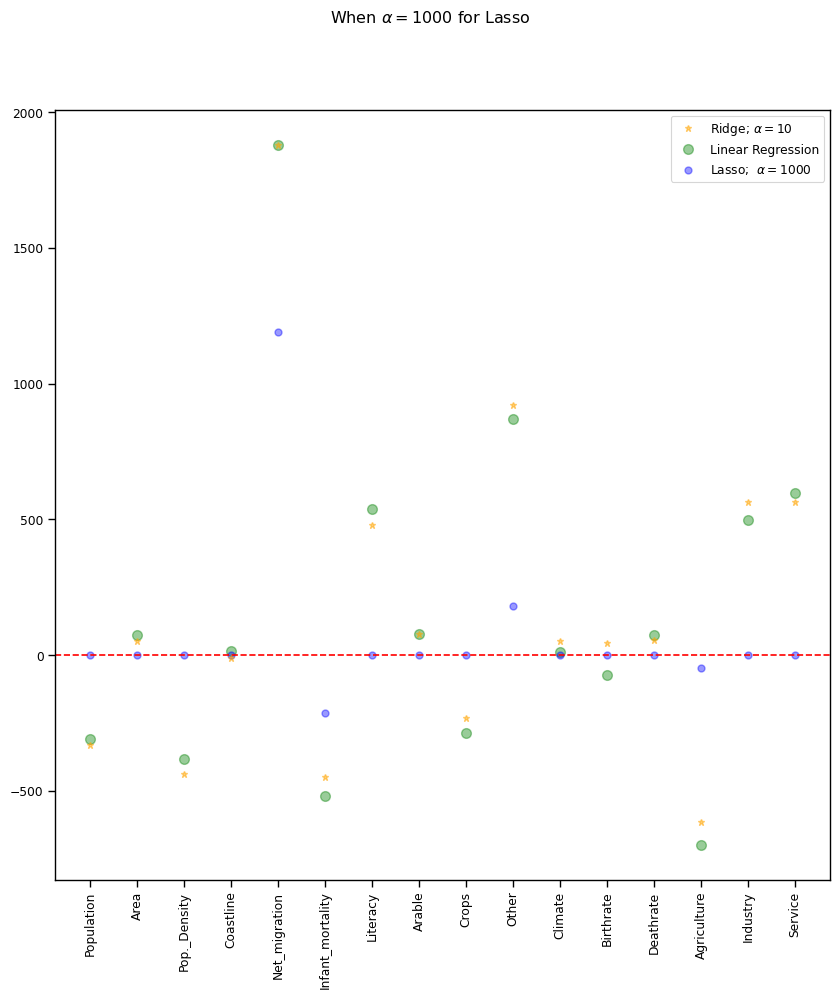

In [83]:
plt.figure(figsize = (10, 10))
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Linear Model'],alpha=0.5,linestyle='none',marker='*',markersize=5,color='orange',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Ridge Model'],alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(coeff_no_phones.Coeffs,coeff_no_phones['Lasso alpha = 1000'],alpha=0.4,linestyle='none',marker='o',markersize=5,color='blue',label=r'Lasso;  $\alpha = 1000$')
plt.xticks(rotation = 90)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.suptitle(r"When $\alpha = 1000$ for Lasso")
plt.legend()
plt.show()

In [84]:
coefficients_df['Zeroed-out'] = (coefficients_df['Lasso alpha = 1000'] == 0)
print(coefficients_df[['Coeffs', 'Lasso alpha = 1000', 'Zeroed-out']].sort_values("Zeroed-out"))

              Coeffs  Lasso alpha = 1000  Zeroed-out
14       Agriculture          -46.431533       False
4      Net_migration         1192.510367       False
5   Infant_mortality         -214.416888       False
7             Phones         7015.248801       False
10             Other          179.808178       False
0         Population           -0.000000        True
13         Deathrate           -0.000000        True
12         Birthrate           -0.000000        True
11           Climate           -0.000000        True
8             Arable           -0.000000        True
15          Industry            0.000000        True
6           Literacy            0.000000        True
3          Coastline           -0.000000        True
2       Pop._Density           -0.000000        True
1               Area            0.000000        True
9              Crops           -0.000000        True
16           Service            0.000000        True
